# ***Final Project* Data Science Batch 36 - Outliers Teams**

Members:


1.   Bayu Purnama (as Project Leader)
2.   Benedikta Imelda
3.   Fernando
4.   Gerrit Ezra Yudi Kairupan
5.   Hafizha Aghnia Hasya
6.   Radhimas Januar Rachman
7.   Triogi Bintari
8.   Yasmin Fauziah



# Import Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import math

from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [ ]:
# Import Dataset
url='https://drive.google.com/file/d/1kLxn65wtmCk1BZllOr2eRckTvBtrbGv0/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_cars = pd.read_csv(url,on_bad_lines='skip')
df_cars.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


# Stage 1

---

## Exploratory Data Analysis (EDA)

---



## 1. Descriptive Statistics

In [ ]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Dari df_cars.info diatas, kita dapat mengetahui tipe data dari tiap fiturnya dan juga dapat diketahui pula jumlah data dari tiap fitur.
Di dalam df_cars.info juga dapat dilihat jumlah nilai yang berbeda, hal ini dapat disebabkan karena nilai kosong atau missing value.


In [ ]:
df_cars.describe(include="all")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558811.000000,548510,548412,548160,545616,493458,558811,558811,547017.000000,558717.000000,558062,558062,558811,558811.000000,558811.000000,558811
unique,NaN,96,973,1975,86,2,550296,38,NaN,NaN,20,17,14264,NaN,NaN,3745
top,NaN,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475914,5,82945,NaN,NaN,110970,244325,19693,NaN,NaN,5334
mean,2010.038696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424512,68323.195797,NaN,NaN,NaN,13769.324646,13611.262461,NaN
std,3.966812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.949439,53397.752933,NaN,NaN,NaN,9679.874607,9749.656919,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28374.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,52256.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,99112.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


**A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?**

Untuk kolom **saledate** sebaiknya diubah menjadi tipe data datetime untuk kemudahan pengelolaan data waktu.<br>
selebihnya semua tipe data sudah sesuai.

In [ ]:
df_cars['saledate'] = pd.to_datetime(df_cars['saledate'], utc=True)

In [ ]:
print(df_cars['saledate'].dtypes)

**B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

In [ ]:
# Hitung jumlah nilai null dalam setiap kolom
jumlah_null = df_cars.isnull().sum()

# Hitung rasio nilai null terhadap total jumlah baris dalam dataset
rasio_null = (jumlah_null / len(df_cars)) * 100

# Buat DataFrame baru untuk menampilkan kolom-kolom yang memiliki nilai null dan rasio nullnya
df_cars_info = pd.DataFrame({
    'Jumlah Null': jumlah_null,
    'Rasio Null (%)': rasio_null
})
print(df_cars_info)

Terdapat kolom yang memiliki missing value, antara lain:
 - make
 - model
 - trim
 - body
 - transmission
 - vin
 - condition
 - odometer
 - color
 - interior

kolom yang memiliki missing value terbanyak ada di kolom transmisson


**C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)**

In [ ]:
df_cars.describe(include=[np.number])

In [ ]:
df_cars.describe(exclude=[np.number])

Kelompok numerik:<br>
- Tidak ada masalah pada kolom condition
- Perbandingan nilai mean dengan median sebagian kolom memiliki selisih yang cukup tinggi. Hal ini menjadi indikasi kemungkinan terdapat nilai outlier pada sebagian kolom
- Adanya anomali pada nilai minimum sellingprice
- Adanya anomali pada nilai maksimum odometer

Kelompok kategorik:<br>
- Kolom transmission didominasi oleh mobil dengan transmisi automatic (lebih dari 50%)
- Kolom color dan interior didominasi oleh mobil dengan warna exterior dan interior black
- Kolom make didominasi oleh mobil dengan merk Ford
- Kolom body didominasi oleh mobil dengan jenis Sedan

Hal yang harus diperhatikan saat data pre-processing:
- Standarisasi penulisan value masing-masing kolom kategorik
- Handling missing value pada kolom yang memiliki nilai NaN, null atau -
- Handling outliers untuk kolom odometer dan sellingprice

## 2. Univariate Analysis

In [ ]:
# Categorize the features
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_cars[nums].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


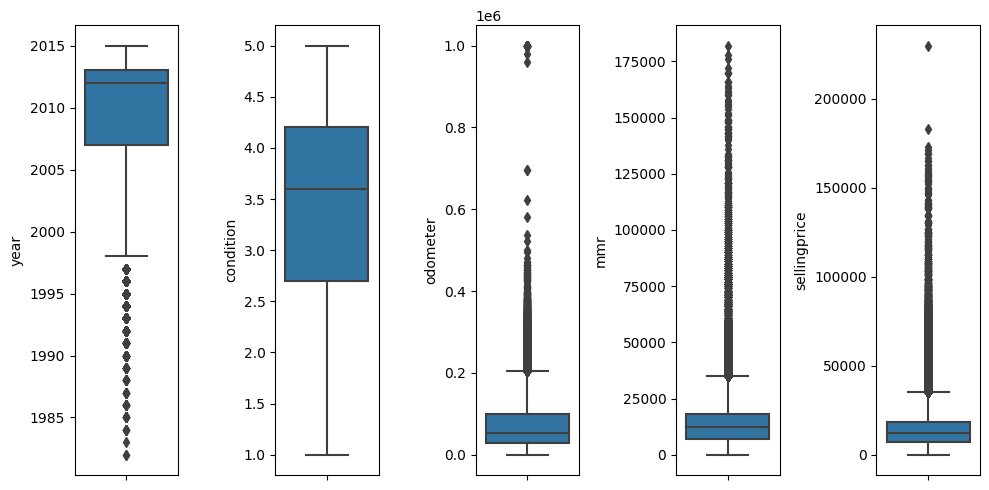

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0,len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y = df_cars[nums[i]])
    plt.tight_layout()

Dari gambar boxplot didapat bahwa column condition tidak memiliki outlier dan distribusinya cenderung negative skewed. Untuk column lain yaitu odometer,mmr dan sellingprice banyak outlier yang terletak di nilai yang lebih besar (positive skewed). Serta dari function detect outlier bisa melihat banyaknya outlier. Oleh karena itu pada data preprocessing dan cleaning, bisa dilakukan penghapusan outlier dengan metode quantile IQR maupun menggunakan log transformation untuk mengatasi positive skewed


Dari Gambar diatas, dapat diketahui data memiliki Outlier di beberapa kolom, maka dari itu mari kita coba temukan banyak outlier tersebut.

In [ ]:
def detect_outliers(df_cars, x):
    Q1 = df_cars[x].quantile(.25)
    Q3 = df_cars[x].quantile(.75)
    IQR = Q3-Q1
    return df_cars[(df_cars[x] < Q1 - 1.5 * IQR) | (df_cars[x] > Q3 + 1.5 * IQR)]

#### Detect Outlier Features

In [ ]:
out_cond = detect_outliers(df_cars, 'condition').shape[0]
print('Jumlah outlier column condition :', out_cond)

Jumlah outlier column condition : 0


In [ ]:
out_odo = detect_outliers(df_cars, 'odometer').shape[0]
print('Jumlah outlier column odometer :', out_odo)

Jumlah outlier column odometer : 10375


In [ ]:
out_mmr = detect_outliers(df_cars, 'mmr').shape[0]
print('Jumlah outlier column mmr :', out_mmr)

Jumlah outlier column mmr : 16315


Dari column feature dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column condition tidak memiliki outlier. Untuk odometer memiliki outlier sebanyakk 10375 dan column mmr memiliki 16315 outlier.


#### Detect Outlier Target

In [ ]:
out_sell = detect_outliers(df_cars, 'sellingprice').shape[0]
print('Jumlah outlier column sellingprice :', out_sell)

Jumlah outlier column sellingprice : 16354


Dari column target dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column sellingprice memiliki 16354 outlier

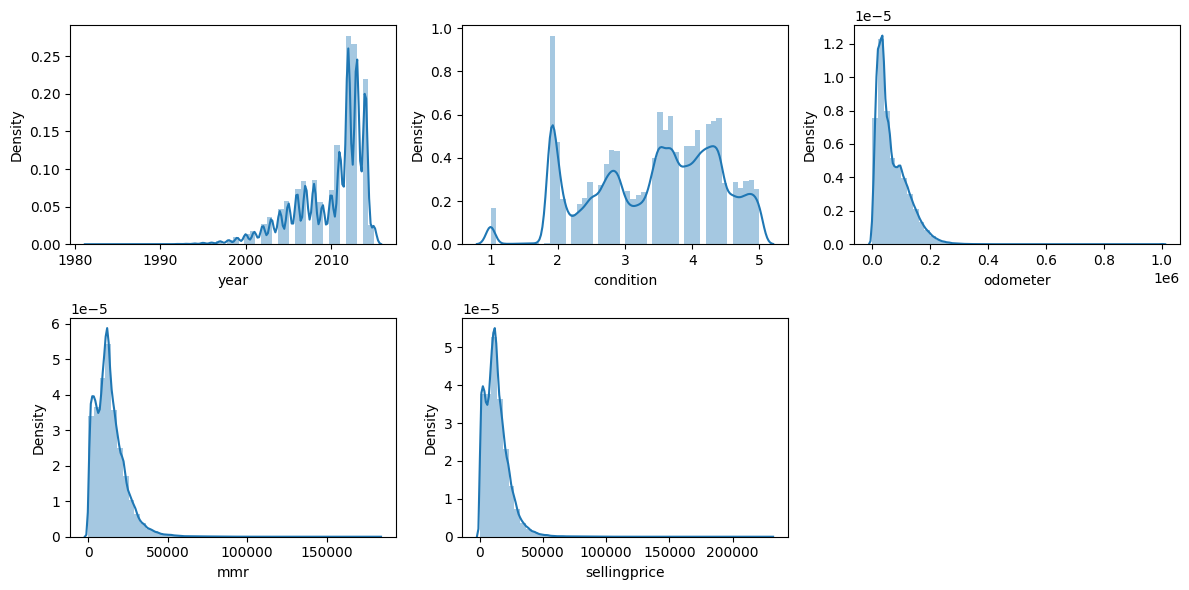

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df_cars[nums[i]])
    plt.tight_layout()

- Dari distribution plot terlihat untuk feature odometer, selling price, serta mmr memiliki distribusi yang positif (positively skewed) dimana nilai outlier cukup jauh ke kanan atau berada di nilai yang besar. sedangkan umumnya data fitur tersebar nilai yang cukup rendah.
- Target memiliki kemiringan yang positif dimana nilai outliernya pun berada pada nilai yang besar
- Fitur condition perlu diperhatikan dikarenakan memiliki skala ordinal pada distribution plot
- Fitur tahun memiliki distribusi kemiringan negatif, yang dimana data/transaksi terjadi cukup benyak >2010

## 3. Multivariate Analysis

<Axes: >

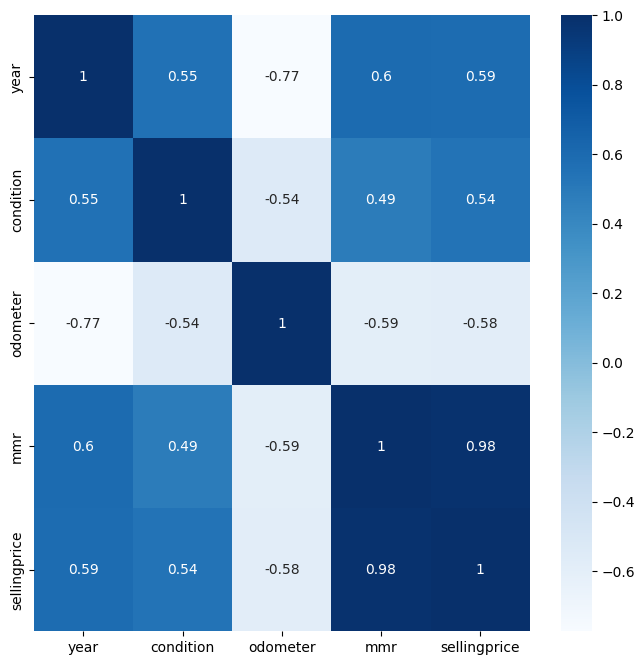

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_cars.corr(), cmap='Blues', annot=True)

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**

- MMR (Manheim Market Report): MMR memiliki korelasi positif yang cukup tinggi dengan harga jual (Selling Price). Hal ini menunjukkan bahwa MMR adalah prediktor yang signifikan untuk harga jual kendaraan. Feature ini harus dipertahankan. <br>
- Year (Tahun Produksi): Year juga memiliki korelasi positif yang cukup kuat dengan harga jual, menunjukkan bahwa tahun produksi kendaraan berpengaruh pada harga jualnya. Feature ini juga relevan dan harus dipertahankan.<br>
- Odometer (Jarak Tempuh): Odometer memiliki korelasi negatif yang moderat dengan harga jual. Semakin rendah nilai odometer, harga jual cenderung lebih tinggi. Ini adalah indikasi yang baik bahwa feature ini relevan dan harus dipertahankan.<br>
- Condition (Kondisi Kendaraan): Condition memiliki korelasi positif yang moderat dengan harga jual. Semakin baik kondisi kendaraan, harga jualnya cenderung lebih tinggi. Feature ini juga penting dan harus dipertahankan.


**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perludilakukan terhadap feature itu?**

- MMR vs. Year: Terdapat kemungkinan bahwa kendaraan dengan MMR tinggi cenderung diproduksi pada tahun yang lebih baru. Pola ini bisa dijelajahi lebih lanjut untuk memahami hubungan sebab-akibat di antara keduanya.<br>
- MMR vs. Odometer: Korelasi negatif antara MMR dan odometer menunjukkan bahwa kendaraan dengan MMR tinggi memiliki jarak tempuh yang lebih rendah. Ini merupakan pola yang diharapkan dan memvalidasi relevansi MMR sebagai prediktor harga jual.<br>
- Year vs. Odometer: Mungkin ada kecenderungan bahwa kendaraan produksi baru memiliki odometer yang lebih rendah. Namun, ini juga bisa dipengaruhi oleh faktor-faktor lain seperti penggunaan kendaraan.


##4. Business Insight

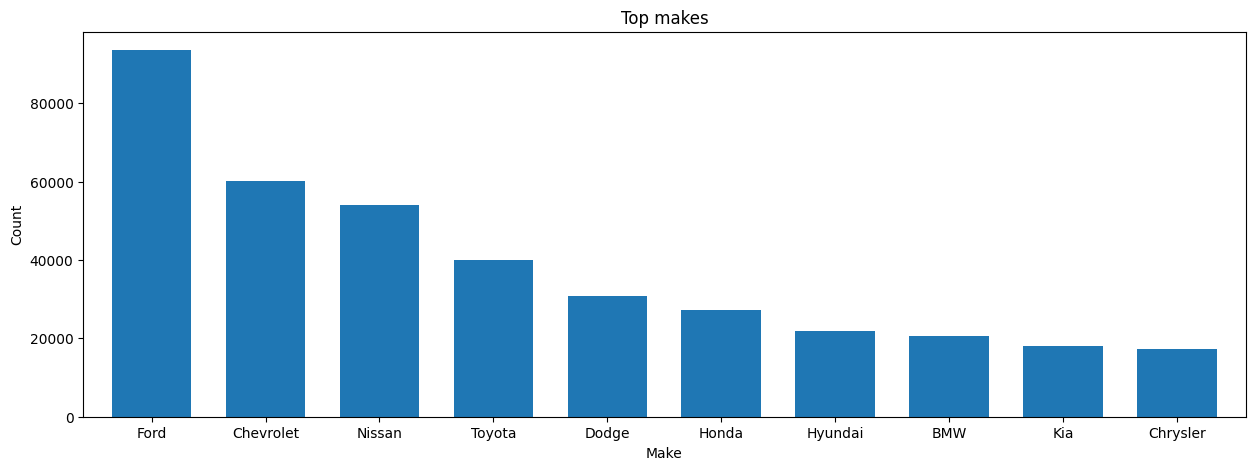

In [ ]:
make_counts = df_cars['make'].value_counts()

top_10_make_counts = make_counts.head(10)

plt.figure(figsize=(15, 5))
top_10_make_counts.plot(kind='bar', width=0.7)
plt.title('Top makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight 1:**\
Brand-brand seperti Ford, Chevrolet, dan Nissan sangat diminati di Amerika dan laku terjual dengan baik.

**Rekomendasi:**\
Dealer dapat fokus pada menyusun komposisi stok unit berdasarkan brand-brand ini dan memperluas penawaran mereka dari brand-brand populer ini.


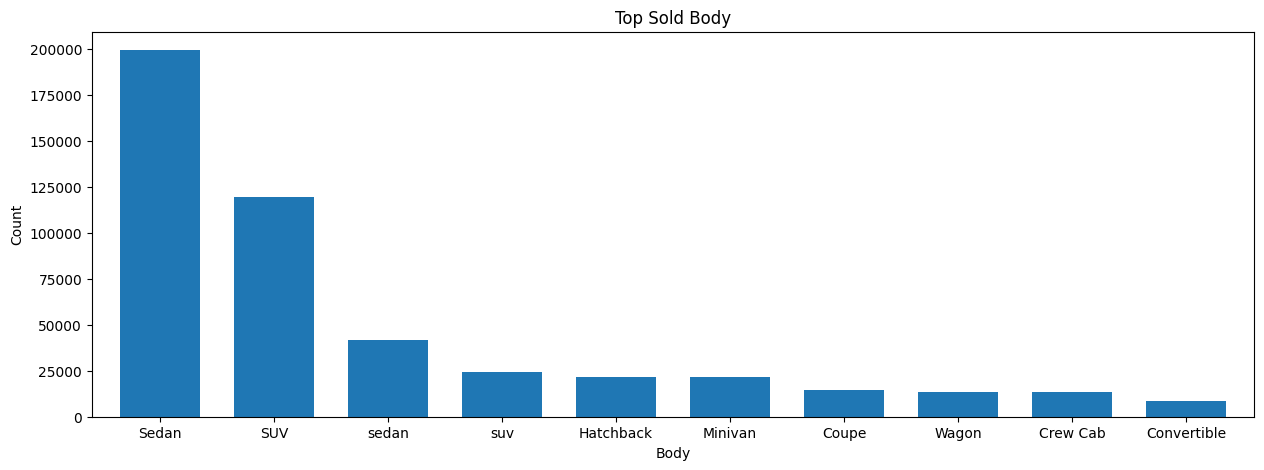

In [ ]:
make_counts = df_cars['body'].value_counts()

top_10_make_counts = make_counts.head(10)

plt.figure(figsize=(15, 5))
top_10_make_counts.plot(kind='bar', width=0.7)
plt.title('Top Sold Body')
plt.xlabel('Body')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Insight 2:**\
Tipe mobil sedan dan SUV lebih diminati oleh konsumen.

**Rekomendasi:**\
Dealer sebaiknya memprioritaskan pembelian varian sedan dan SUV untuk memenuhi permintaan yang tinggi di pasar.


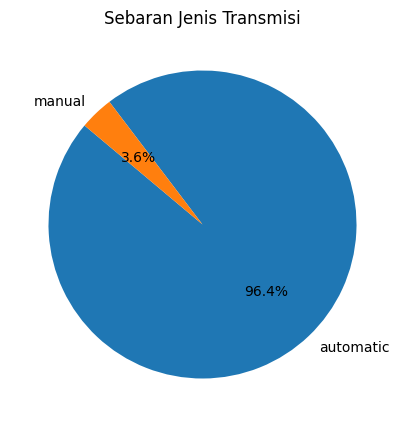

In [ ]:
transmission_counts = df_cars['transmission'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sebaran Jenis Transmisi')
plt.show()

**Insight 3:**\
Mobil dengan transmisi otomatis lebih laku terjual.

**Rekomendasi:**\
Dealer harus membeli unit stok dengan transmisi otomatis dalam jumlah yang lebih besar untuk memenuhi permintaan konsumen.


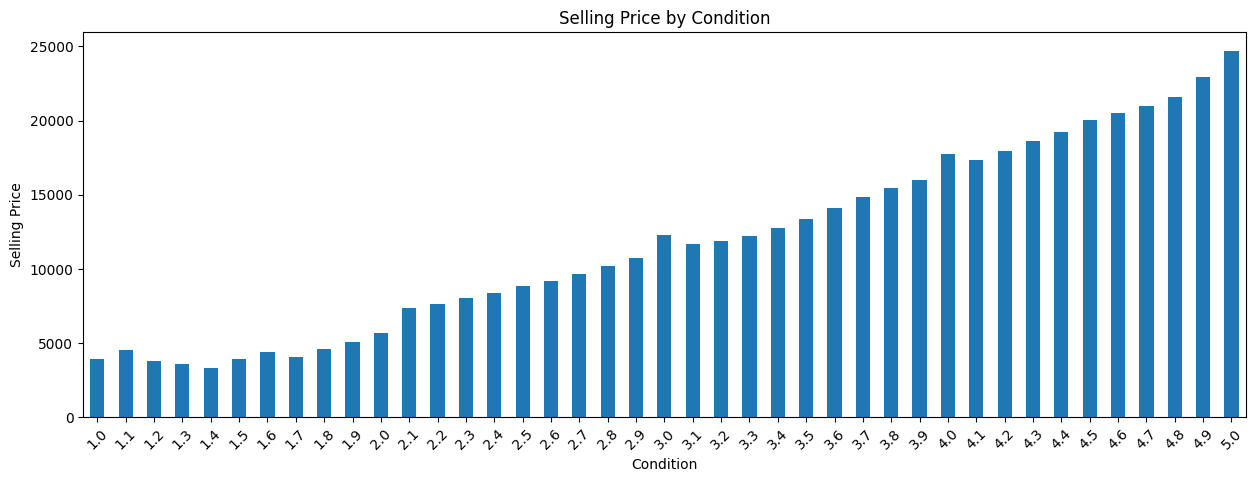

In [ ]:
condition_means = df_cars.groupby('condition')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 4:**\
Semakin baik kondisi mobil (rating diatas 3) maka harga belinya juga semakin tinggi sementara unit dengan kondisi buruk (rating dibawah 3) banyak diminati karena harga lebih murah.

**Rekomendasi:**\
Dealer dapat membeli unit dengan kondisi kurang baik dan memperbaikinya sebelum dijual dengan harga yang lebih baik, meningkatkan potensi keuntungan.


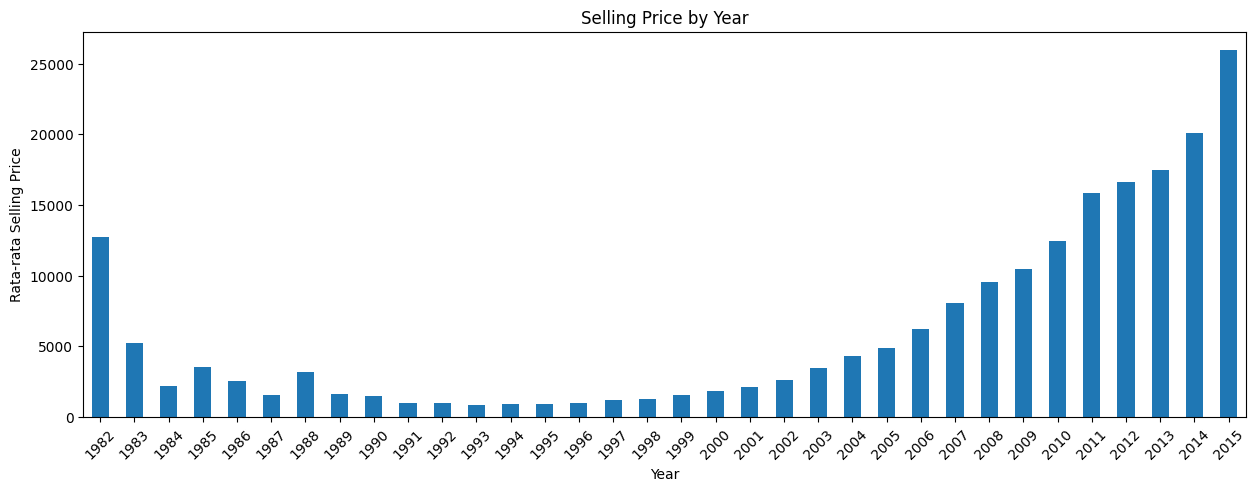

In [ ]:
condition_means = df_cars.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Rata-rata Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 5:**\
Mobil keluaran tahun 1980an memiliki nilai jual yang lebih tinggi daripada mobil tahun 2000an, kemungkinan karena termasuk dalam kategori mobil antik.

**Rekomendasi:**\
Dealer dapat menawarkan mobil-mobil vintage ini kepada konsumen yang mencari barang antik dan mengidentifikasi mobil-mobil ini dalam stok mereka.


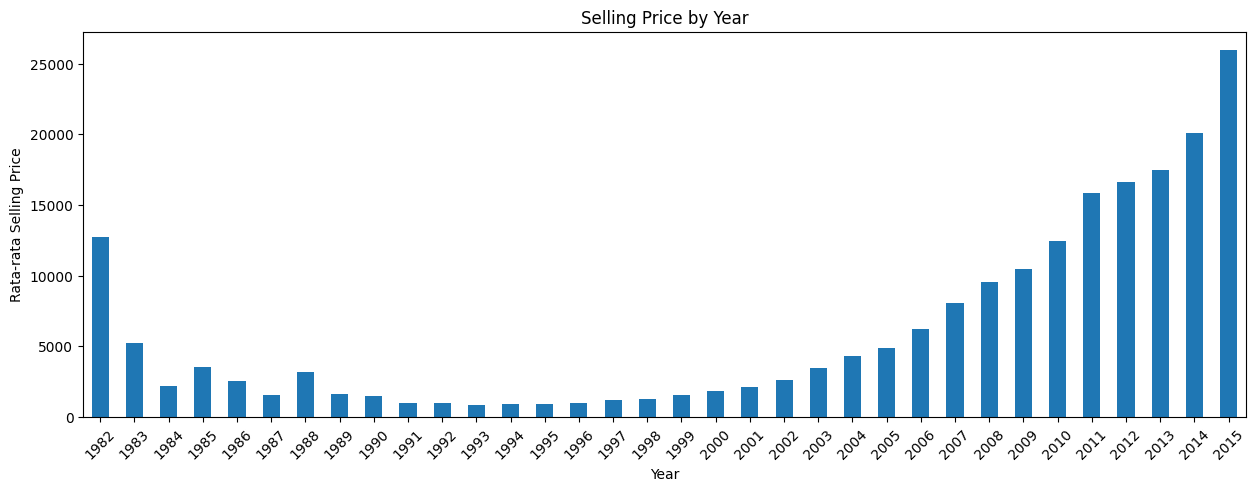

In [ ]:
condition_means = df_cars.groupby('year')['sellingprice'].mean()

plt.figure(figsize=(15, 5))
condition_means.plot(kind='bar')
plt.title('Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Rata-rata Selling Price')
plt.xticks(rotation=45)
plt.show()

**Insight 6:**\
Penjualan mobil terbanyak berdasarkan tahun produksi adalah 2013, 2014, dan 2015, menunjukkan bahwa konsumen lebih suka mobil terbaru.

**Rekomendasi:**\
Dealer dapat fokus pada menjual mobil keluaran terbaru untuk menarik lebih banyak konsumen.


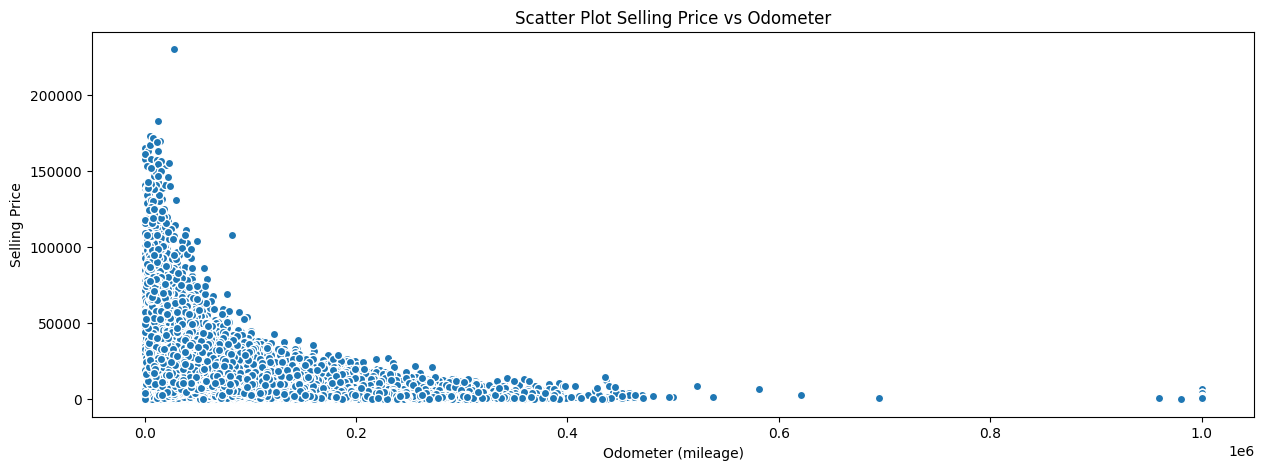

In [ ]:
# Plot scatter plot untuk visualisasi antara 'sellingprice' dan 'odometer' dengan garis putih pada setiap lingkaran
plt.figure(figsize=(15, 5))
plt.scatter(df_cars['odometer'], df_cars['sellingprice'], edgecolor='white')  # Menambahkan garis putih pada setiap marker
plt.title('Scatter Plot Selling Price vs Odometer')
plt.xlabel('Odometer (mileage)')
plt.ylabel('Selling Price')
plt.show()

**Insight 7:**\
Harga jual mobil dipengaruhi oleh beberapa faktor, termasuk odometer, kondisi mobil (nilai rating), dan tahun keluaran.

**Rekomendasi:**\
Dealer harus memperhatikan faktor-faktor ini dalam menentukan harga jual untuk memaksimalkan keuntungan.

## 5. Git

https://github.com/gerritezra/Outliers-Finpro-DS36.git

#Stage 2
---

##**1. Data Cleansing Process**

In [ ]:
df = df_cars

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


Pengamatan\:
1. Data terdiri dari 55811 baris,
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris),
3. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom (sudah sesuai).

In [ ]:
df.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
443628,2006,Porsche,Cayenne,Base,SUV,automatic,wp1aa29p36la27552,ga,3.0,111502.0,white,brown,cameron motor sports,9125,9900,Thu May 21 2015 02:30:00 GMT-0700 (PDT)
187296,2001,Acura,TL,3.2,Sedan,automatic,19uua56621a004653,ga,1.9,262779.0,blue,tan,gwinnett place honda,650,2000,Tue Feb 10 2015 05:00:00 GMT-0800 (PST)
452089,2005,Chevrolet,Venture,Plus,Minivan,automatic,1gndv03e65d111508,nj,2.5,172806.0,silver,gray,lester glenn buick,1325,500,Wed May 27 2015 02:30:00 GMT-0700 (PDT)
159039,2012,Honda,Civic,EX,Sedan,automatic,19xfb2f83ce028383,il,3.6,33570.0,black,gray,"ahfc/honda lease trust/hvt, inc. eot",12200,12500,Thu Jan 22 2015 02:00:00 GMT-0800 (PST)
177811,2007,Mitsubishi,Eclipse,GS,Hatchback,automatic,4a3ak24f47e025034,fl,1.9,90698.0,blue,black,wells fargo dealer services,4550,4300,Tue Jan 27 2015 01:30:00 GMT-0800 (PST)


## Droping Kolom yang Tidak Relevan

### Drop Kolom `mmr`

In [ ]:
df.drop(columns = 'mmr', inplace = True, axis = 1)

Alasan drop kolom `mmr`:
- Kolom mmr memiliki nilai median dan mean yang berbeda sehingga distribusinya skew,
- Pada correlation heatmap, bisa diamati bahwa kolom `mmr` memiliki korelasi kuat positif terhadap target `sellingprice` yaitu 0.98,
- Pada pair plot, bisa diamati bahwa kolom `mmr` memiliki korelasi linear terhadap target `sellingprice`,
- MMR adalah Manheim Market Report, sebuah indikator pada harga grosir untuk menentukan harga mobil. Hal ini menunjukkan mengapa nilai MMR begitu dekat dengan selling price.

References:
https://www.autoauctionmall.com/learning-center/what-does-mmr-mean/

### Drop Kolom `state`

In [ ]:
price_segmentation = np.where(df['sellingprice']<10000, 'low', np.where(df['sellingprice']>30000, 'high', 'med'))

In [ ]:
df['state'] = df['state'].str.lower()

def state(x):
    if x['state'] == 'fl':
        state = 'fl'
    elif x['state'] == 'ca':
        state = 'ca'
    elif x['state'] == 'pa':
        state = 'pa'
    elif x['state'] == 'tx':
        state = 'tx'
    elif x['state'] == 'ga':
        state = 'ga'
    elif x['state'] == 'nj':
        state = 'nj'
    elif x['state'] == 'il':
        state = 'il'
    elif x['state'] == 'nc':
        state = 'nc'
    elif x['state'] == 'oh':
        state = 'oh'
    elif x['state'] == 'tn':
        state = 'tn'
    else:
        state = 'others'
    return state

df['state'] = df.apply(lambda x: state(x), axis=1)

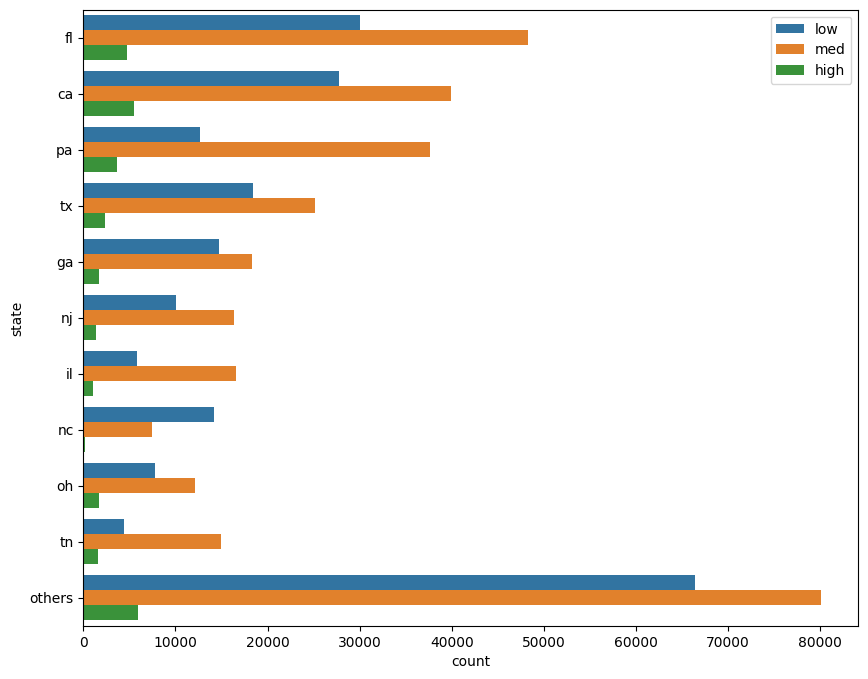

In [ ]:
plt.figure(figsize=(10,8))
hue_order = ['low', 'med', 'high']
order=['fl', 'ca', 'pa', 'tx', 'ga', 'nj', 'il', 'nc', 'oh', 'tn', 'others']
sns.countplot(y='state', data=df, hue=price_segmentation, hue_order=hue_order, order=order);

In [ ]:
df.drop(columns = 'state', inplace = True, axis = 1)

Alasan drop kolom `state`:
- Persebaran rasio segmentasi harga (low/med/high) dari setiap state memiliki nilai yang sama,
- Setiap stage didominasi oleh medium, sedangkan segmentasi high menjadi yang paling sedikit. Oleh karena itu, tidak terlihat ada perbedaan yang mencolok.

### Drop Kolom `vin`

In [ ]:
df.drop(columns = 'vin', inplace = True, axis = 1)

Alasan drop kolom `vin`:
- `vin` merupakan kode pengenal yang biasanya akan berguna pada spesifik automobil saja (tidak berlaku ke semua mobil),
- secara bisnis `vin` atau nomor identitas kendaraan tidak memiliki pengaruh terhadap target/label `sellingprice`.

References: https://www.autocheck.com/vehiclehistory/vin-basics

### Drop Kolom `interior`

In [ ]:
df.drop(columns = 'interior', inplace = True, axis = 1)

Alasan drop kolom `interior`: kolom `interior` memiliki kesamaan nilai dengan `color` sehingga diputuskan untuk drop salah satu nya.

### Drop Kolom `seller`

In [ ]:
df.drop(columns = 'seller', inplace = True, axis = 1)

Alasan drop kolom `seller`: perusahaan tidak melihat seller, karena kami tetap akan melakukan filtering pada kendaraan berdasarkan kondisi, odometer, dll (fair value). Sehingga, siapapun sellernya bisa melakukan penjualan (tidak ada perbedaan). Kolom `seller` memiliki jumlah unique values yang sangat banyak (kardinalitas tinggi), sehingga akan menyulitkan ketika melakukan feature encoding.

## Statistical Summary

In [ ]:
nums_update = ['year', 'condition', 'odometer', 'sellingprice']
cats_update = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']

In [ ]:
df[nums_update].describe()

,year,condition,odometer,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13611.262461
std,3.966812,0.949439,53397.752933,9749.656919
min,1982.000000,1.000000,1.000000,1.000000
25%,2007.000000,2.700000,28374.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df[cats_update].describe()

,make,model,trim,body,transmission,color,saledate
count,548510,548412,548160,545616,493458,558062,558811
unique,96,973,1975,86,2,20,3745
top,Ford,Altima,Base,Sedan,automatic,black,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,110970,5334


## A. Handle Missing Values

In [ ]:
# jumlah missing values di setiap kolom
df.isna().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
odometer           94
year                0
sellingprice        0
saledate            0
dtype: int64

In [ ]:
# Hitung jumlah nilai null dalam setiap kolom
jumlah_null = df.isnull().sum()

# Hitung rasio nilai null terhadap total jumlah baris dalam dataset
rasio_null = (jumlah_null / len(df)) * 100

# Buat DataFrame baru untuk menampilkan kolom-kolom yang memiliki nilai null dan rasio nullnya
df_cars_info = pd.DataFrame({
    'Jumlah Null': jumlah_null,
    'Rasio Null (%)': rasio_null
})
print(df_cars_info)

              Jumlah Null  Rasio Null (%)
year                    0        0.000000
make                10301        1.843378
model               10399        1.860915
trim                10651        1.906011
body                13195        2.361263
transmission        65353       11.695010
condition           11794        2.110553
odometer               94        0.016821
color                 749        0.134035
sellingprice            0        0.000000
saledate                0        0.000000


In [ ]:
# persentase missing values di setiap kolom
missing_values = df.isna().sum().sort_values(ascending = False)/len(df)*100
missing_values

transmission    11.695010
body             2.361263
condition        2.110553
trim             1.906011
model            1.860915
make             1.843378
color            0.134035
odometer         0.016821
year             0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [ ]:
missing_values[['body', 'condition', 'trim', 'model', 'make', 'color', 'odometer']].sum()

10.232976802532521

- `transmission`: dilakukan fillna dengan nilai modus,
- `body`, `trim`, `condition`, `color`, `odometer`, `make`, dan `model` : drop karena secara total persentasenya hanya 10%,
- `year`, `saledate`, dan `sellingprice`: tidak memiliki missing values sehingga tidak perlu dihandle.

### Dataframe Impute (`transmission`) dan Drop (`body`, `condition`, `make`, `color`, `odometer`)

In [ ]:
# impute transmission dengan modus
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

In [ ]:
# drop missing values dari feature `body`, `model`, `trim`, `condition`, `color`, `odometer`, dan `make`
df = df.dropna()

In [ ]:
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
sellingprice    0
saledate        0
dtype: int64

## B. Handle Duplicated Data

In [ ]:
df.duplicated().sum()

0

Tidak ada data yang duplikat pada dataset.

In [ ]:
print(cats_update)
print(nums_update)

['make', 'model', 'trim', 'body', 'transmission', 'color', 'saledate']
['year', 'condition', 'odometer', 'sellingprice']


## Handle Unique Value

#### **Kolom `transmission`**

In [ ]:
df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [ ]:
df['transmission'].value_counts()

automatic    517298
manual        16362
Name: transmission, dtype: int64

#### **Kolom `make`**

In [ ]:
df['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Buick', 'Cadillac', 'Acura', 'Lexus', 'Hyundai', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'Jaguar', 'Volkswagen', 'Toyota',
       'Subaru', 'Scion', 'Porsche', 'Dodge', 'FIAT', 'Chrysler',
       'Ferrari', 'Honda', 'GMC', 'Ram', 'smart', 'Bentley', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'Saab', 'Suzuki',
       'Oldsmobile', 'Geo', 'Rolls-Royce', 'Isuzu', 'Plymouth', 'Tesla',
       'Aston Martin', 'Fisker', 'Daewoo', 'Lamborghini', 'Lotus'],
      dtype=object)

In [ ]:
len(df['make'].unique())

53

In [ ]:
df['make'] = df['make'].str.lower()
len(df['make'].unique())

53

In [ ]:
df['make'].value_counts().iloc[:9]

ford         91908
chevrolet    58817
nissan       53085
toyota       38991
dodge        30102
honda        26373
hyundai      21474
bmw          20140
kia          17870
Name: make, dtype: int64

In [ ]:
# Ubah nama make menjadi others jika tidak termasuk 10 besar penjualan

def top_10_make(x):
  if x['make'] == 'ford':
    top_10_make = 'ford'
  elif x['make'] == 'chevrolet':
    top_10_make = 'chevrolet'
  elif x['make'] == 'nissan':
    top_10_make = 'nissan'
  elif x['make'] == 'toyota':
    top_10_make = 'toyota'
  elif x['make'] == 'dodge':
    top_10_make = 'dodge'
  elif x['make'] == 'honda':
    top_10_make = 'honda'
  elif x['make'] == 'hyundai':
    top_10_make = 'hyundai'
  elif x['make'] == 'bmw':
    top_10_make = 'bmw'
  elif x['make'] == 'kia':
    top_10_make = 'kia'
  else:
    top_10_make = 'others'
  return top_10_make

df['top_10_make'] = df.apply(lambda x: top_10_make(x), axis=1)
df = df.drop('make', axis=1)

#### **Kolom `model`**

In [ ]:
len(df['model'].unique())

772

In [ ]:
df['model'] = df['model'].str.lower()
len(df['model'].unique())

768

In [ ]:
df['model'].value_counts(ascending = False).iloc[:9]

altima           19159
f-150            14164
fusion           12836
camry            12326
escape           11714
focus            10230
accord            8865
3 series          8019
grand caravan     7840
Name: model, dtype: int64

In [ ]:
# Ubah nama model menjadi others jika tidak termasuk 10 besar

def top_10_model(x):
  if x['model'] == 'altima':
    top_10_model = 'altima'
  elif x['model'] == 'f-150':
    top_10_model = 'f-150'
  elif x['model'] == 'fusion':
    top_10_model = 'fusion'
  elif x['model'] == 'camry':
    top_10_model = 'camry'
  elif x['model'] == 'escape':
    top_10_model = 'escape'
  elif x['model'] == 'focus':
    top_10_model = 'focus'
  elif x['model'] == 'accord':
    top_10_model = 'accord'
  elif x['model'] == '3 series':
    top_10_model = '3 series'
  elif x['model'] == 'grand caravan':
    top_10_model = 'grand caravan'
  else:
    top_10_model = 'others'
  return top_10_model

df['top_10_model'] = df.apply(lambda x: top_10_model(x), axis=1)
df = df.drop('model', axis=1)

#### Kolom `trim`

In [ ]:
len(df['trim'].unique())

1523

In [ ]:
df['trim'] = df['trim'].str.lower()
len(df['trim'].unique())

1504

In [ ]:
df['trim'].value_counts().iloc[:9]

base       54098
se         43024
lx         20367
limited    17969
lt         16640
xlt        16357
ls         13052
le         12692
gls        12175
Name: trim, dtype: int64

In [ ]:
# Ubah nama trim menjadi others jika tidak termasuk 10 besar

def top_10_trim(x):
  if x['trim'] == 'base':
    top_10_trim = 'base'
  elif x['trim'] == 'se':
    top_10_trim = 'se'
  elif x['trim'] == 'lx':
    top_10_trim = 'lx'
  elif x['trim'] == 'limited':
    top_10_trim = 'limited'
  elif x['trim'] == 'lt':
    top_10_trim = 'lt'
  elif x['trim'] == 'xlt':
    top_10_trim = 'xlt'
  elif x['trim'] == 'ls':
    top_10_trim = 'ls'
  elif x['trim'] == 'le':
    top_10_trim = 'le'
  elif x['trim'] == 'gls':
    top_10_trim = 'gls'
  else:
    top_10_trim = 'others'
  return top_10_trim

df['top_10_trim'] = df.apply(lambda x: top_10_trim(x), axis=1)
df = df.drop('trim', axis=1)

#### **Kolom `body`**

In [ ]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'G37 Coupe', 'Mega Cab',
       'Cab Plus 4', 'Q60 Coupe', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Cab Plus', 'GranTurismo Convertible',
       'CTS-V Wagon', 'Ram Van', 'convertible', 'minivan', 'suv',
       'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crewmax c

In [ ]:
len(df['body'].unique())

86

In [ ]:
df['body'] = df['body'].str.lower()
len(df['body'].unique())

45

In [ ]:
body_list=[]

for index,kolom in df.iterrows():
  body=kolom['body']
  if body.endswith('cab')==True:
    bodies= 'cab'
  elif body.startswith('cab')==True:
    bodies= 'cab'
  elif body.endswith('coupe')==True:
    bodies= 'coupe'
  elif body.endswith('koup')==True:
    bodies= 'coupe'
  elif body.endswith('van')==True:
    bodies= 'van'
  elif body.endswith('wagon')==True:
    bodies= 'wagon'
  elif body.endswith('convertible')==True:
    bodies= 'convertible'
  elif body.endswith('suv')==True:
    bodies= 'suv'
  elif body.endswith('sedan')==True:
    bodies= 'sedan'
  elif body.endswith('hatchback')==True:
    bodies= 'hatchback'
  else:
    bodies='others'
  body_list.append(bodies)

df['body']=body_list

In [ ]:
df['body'].value_counts().iloc[:10]

sedan          243857
suv            140531
cab             37399
van             31242
hatchback       25737
coupe           19655
wagon           15729
convertible     10636
others           8874
Name: body, dtype: int64

#### **Kolom `color`**

In [ ]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
len(df['color'].unique())

20

In [ ]:
df['color'].value_counts().iloc[:10]

black     106600
white     101837
gray       80004
silver     79518
blue       48533
red        41635
—          24371
gold       10471
green      10361
beige       8591
Name: color, dtype: int64

In [ ]:
# Ubah nama color menjadi others jika tidak termasuk 10 besar

def top_10_color(x):
  if x['color'] == 'black':
    top_10_color = 'black'
  elif x['color'] == 'white':
    top_10_color = 'white'
  elif x['color'] == 'gray':
    top_10_color = 'gray'
  elif x['color'] == 'silver':
    top_10_color = 'silver'
  elif x['color'] == 'blue':
    top_10_color = 'blue'
  elif x['color'] == 'red':
    top_10_color = 'red'
  elif x['color'] == 'gold':
    top_10_color = 'gold'
  elif x['color'] == 'green':
    top_10_color = 'green'
  elif x['color'] == 'burgundy':
    top_10_color = 'burgundy'
  else:
    top_10_color = 'others'
  return top_10_color

df['top_10_color'] = df.apply(lambda x: top_10_color(x), axis=1)
df = df.drop('color', axis=1)

#### Kolom `sellingprice`

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,533660.000000,533660.000000,533660.000000,533660.000000
mean,2010.231145,3.435993,66253.478065,13859.962654
std,3.828440,0.945515,52093.210650,9673.482968
min,1990.000000,1.000000,1.000000,1.000000
25%,2008.000000,2.700000,27746.750000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.loc[df['sellingprice']==1]

,year,body,transmission,condition,odometer,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
48453,2003,sedan,automatic,2.1,1.0,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST),others,others,others,black
293223,2014,van,automatic,4.1,31886.0,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),ford,others,others,white
348252,1995,suv,automatic,1.0,254132.0,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST),others,others,ls,red


In [ ]:
# Terdapat 3 data yang memiliki nilai sellingprice weird, maka bisa di drop
df = df[ ~(df['sellingprice'] == 1) ]

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,533657.000000,533657.000000,533657.000000,533657.000000
mean,2010.231180,3.435999,66253.314554,13860.040564
std,3.828378,0.945510,52092.622015,9673.454348
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,27747.000000,7300.000000
50%,2012.000000,3.600000,50145.000000,12400.000000
75%,2013.000000,4.200000,95813.000000,18400.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.sort_values(by='sellingprice')

,year,body,transmission,condition,odometer,sellingprice,saledate,top_10_make,top_10_model,top_10_trim,top_10_color
502064,2002,sedan,automatic,1.9,132230.0,100,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT),ford,others,others,silver
406428,2005,sedan,automatic,1.0,999999.0,100,Thu Apr 02 2015 05:02:00 GMT-0700 (PDT),hyundai,others,gls,white
196184,2004,van,automatic,2.0,106495.0,100,Wed Jan 28 2015 06:30:00 GMT-0800 (PST),others,others,base,silver
466132,2006,suv,automatic,1.0,256040.0,100,Thu May 28 2015 05:01:00 GMT-0700 (PDT),others,others,others,silver
421784,2002,suv,automatic,1.9,145161.0,100,Thu May 14 2015 03:00:00 GMT-0700 (PDT),dodge,others,others,silver
...,...,...,...,...,...,...,...,...,...,...,...
125095,2012,sedan,automatic,4.5,14316.0,169500,Wed Jan 14 2015 01:40:00 GMT-0800 (PST),others,others,base,black
545500,2013,sedan,automatic,4.2,7852.0,171500,Wed Jun 17 2015 03:05:00 GMT-0700 (PDT),others,others,base,white
446941,2015,sedan,automatic,4.1,5277.0,173000,Thu May 21 2015 05:00:00 GMT-0700 (PDT),others,others,others,white
548146,2011,coupe,automatic,4.6,12116.0,183000,Wed Jun 17 2015 03:40:00 GMT-0700 (PDT),others,others,base,red


## C. Handle Outliers

### Menggunakan IQR

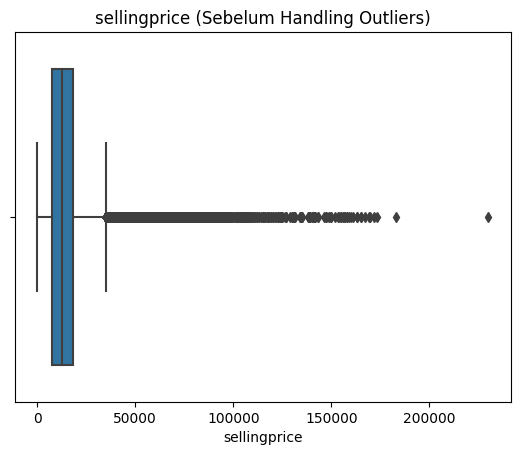

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Sebelum Handling Outliers)');

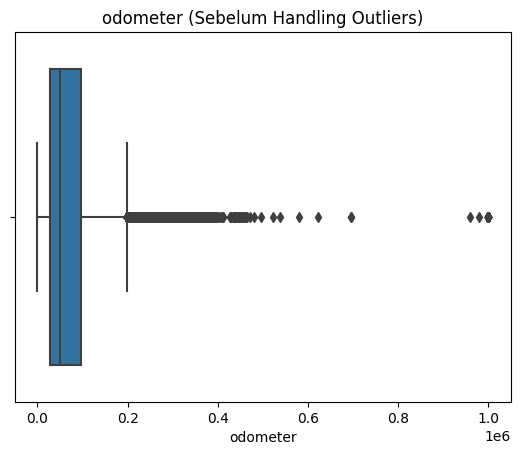

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Sebelum Handling Outliers)');

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['odometer', 'sellingprice']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 533657
Jumlah baris setelah memfilter outlier: 506993


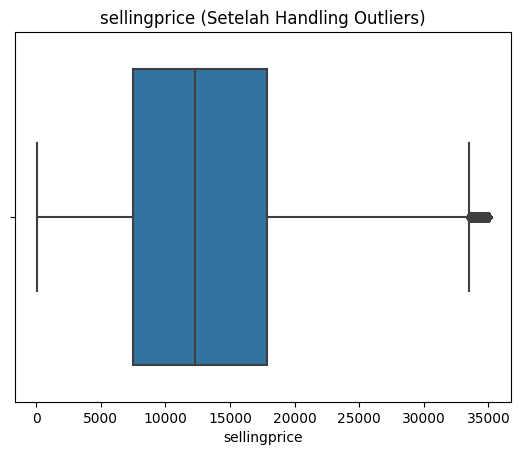

In [ ]:
sns.boxplot(x=df['sellingprice'])
plt.title('sellingprice (Setelah Handling Outliers)');

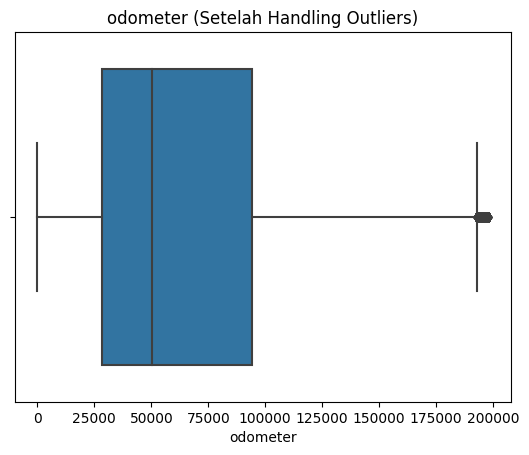

In [ ]:
sns.boxplot(x=df['odometer'])
plt.title('odometer (Setelah Handling Outliers)');

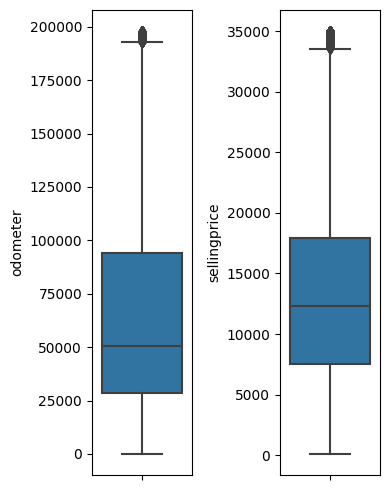

In [ ]:
# boxplot odometer dan sellingprice setelah handling outliers
nnn = ['odometer','sellingprice']
plt.figure(figsize=(4,5))
for i in range(0,len(nnn)):
    plt.subplot(1, len(nnn), i+1)
    sns.boxplot(y = df[nnn[i]])
    plt.tight_layout()

## D. Feature Transformation

In [ ]:
df.describe()

,year,condition,odometer,sellingprice
count,506993.000000,506993.000000,506993.000000,506993.000000
mean,2010.299556,3.435053,63887.029415,13120.613036
std,3.693058,0.932121,45295.090504,7635.078041
min,1990.000000,1.000000,1.000000,100.000000
25%,2008.000000,2.700000,28326.000000,7500.000000
50%,2012.000000,3.600000,50484.000000,12300.000000
75%,2013.000000,4.200000,94104.000000,17900.000000
max,2015.000000,5.000000,197911.000000,35000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# odometer kita re-scale ke [0,1]
df['odometer_norm'] = MinMaxScaler().fit_transform(df['odometer'].values.reshape(len(df), 1))

# Condition menggunakan standarisasi (distribusinya sudah mendekati normal)
df['condition_std'] = StandardScaler().fit_transform(df['condition'].values.reshape(len(df), 1))

In [ ]:
df.describe()

,year,condition,odometer,sellingprice,odometer_norm,condition_std
count,506993.000000,506993.000000,506993.000000,506993.000000,506993.000000,5.069930e+05
mean,2010.299556,3.435053,63887.029415,13120.613036,0.322803,6.883530e-16
std,3.693058,0.932121,45295.090504,7635.078041,0.228867,1.000001e+00
min,1990.000000,1.000000,1.000000,100.000000,0.000000,-2.612380e+00
25%,2008.000000,2.700000,28326.000000,7500.000000,0.143121,-7.885812e-01
50%,2012.000000,3.600000,50484.000000,12300.000000,0.255081,1.769591e-01
75%,2013.000000,4.200000,94104.000000,17900.000000,0.475484,8.206527e-01
max,2015.000000,5.000000,197911.000000,35000.000000,1.000000,1.678911e+00


## E. Feature Encoding

In [ ]:
df_simpan = df

In [ ]:
cats_update = ['top_10_make', 'top_10_model','top_10_trim','body', 'transmission','top_10_color', 'saledate']

In [ ]:
for col in cats_update:
  print(f'value counts dari kolom {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts dari kolom top_10_make
others       163391
ford          88313
chevrolet     55454
nissan        52380
toyota        37149
dodge         29412
honda         25059
hyundai       21260
kia           17745
bmw           16830
Name: top_10_make, dtype: int64
------------------------------ 

value counts dari kolom top_10_model
others           404927
altima            18973
f-150             13094
fusion            12813
camry             11852
escape            11624
focus             10181
accord             8258
grand caravan      7725
3 series           7546
Name: top_10_model, dtype: int64
------------------------------ 

value counts dari kolom top_10_trim
others     308515
base        50188
se          42570
lx          19885
limited     17273
lt          16009
xlt         15700
ls          12470
le          12306
gls         12077
Name: top_10_trim, dtype: int64
------------------------------ 

value counts dari kolom body
sedan          236173
suv            130887
ca

Strategi encoding:
- `transmission`, `top_10_make`, `top_10_model`, `top_10_trim`, `body`, `top_10_model`: one hot encoding

### One Hot Encoding `transmission`

In [ ]:
?pd.get_dummies

In [ ]:
one_hot_encoded_transmission = pd.get_dummies(df['transmission'], prefix='is', drop_first=True)

df = pd.concat([df, one_hot_encoded_transmission], axis=1)

In [ ]:
one_hot_encoded_transmission

,is_manual
0,0
1,0
2,0
3,0
5,0
...,...
558806,0
558807,0
558808,0
558809,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506993 entries, 0 to 558810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           506993 non-null  int64  
 1   body           506993 non-null  object 
 2   transmission   506993 non-null  object 
 3   condition      506993 non-null  float64
 4   odometer       506993 non-null  float64
 5   sellingprice   506993 non-null  int64  
 6   saledate       506993 non-null  object 
 7   top_10_make    506993 non-null  object 
 8   top_10_model   506993 non-null  object 
 9   top_10_trim    506993 non-null  object 
 10  top_10_color   506993 non-null  object 
 11  odometer_norm  506993 non-null  float64
 12  condition_std  506993 non-null  float64
 13  is_manual      506993 non-null  uint8  
dtypes: float64(4), int64(2), object(7), uint8(1)
memory usage: 54.6+ MB


In [ ]:
df = df.drop('transmission', axis=1)

In [ ]:
df_simpan['transmission'].value_counts()

automatic    491613
manual        15380
Name: transmission, dtype: int64

In [ ]:
df['is_manual'].value_counts()

0    491613
1     15380
Name: is_manual, dtype: int64

### One Hot Encoding `top_10_make`

In [ ]:
df['top_10_make'].value_counts(ascending = False)

others       163391
ford          88313
chevrolet     55454
nissan        52380
toyota        37149
dodge         29412
honda         25059
hyundai       21260
kia           17745
bmw           16830
Name: top_10_make, dtype: int64

In [ ]:
one_hot_encoded = pd.get_dummies(df['top_10_make'], prefix='make')

df = pd.concat([df, one_hot_encoded], axis=1)

# make_others di-drop agar tidak terjadi multicolinearity
df = df.drop('make_others', axis=1)

In [ ]:
one_hot_encoded.head()

,make_bmw,make_chevrolet,make_dodge,make_ford,make_honda,make_hyundai,make_kia,make_nissan,make_others,make_toyota
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = df.drop('top_10_make', axis=1)

### One Hot Encoding `body`

In [ ]:
df['body'].value_counts(ascending = False)

sedan          236173
suv            130887
cab             33592
van             30130
hatchback       25402
coupe           17855
wagon           15440
convertible      9435
others           8079
Name: body, dtype: int64

In [ ]:
df_encoded_body = pd.get_dummies(df['body'], prefix='body')

df = pd.concat([df, df_encoded_body], axis=1)

df = df.drop('body_others', axis=1)

In [ ]:
df_encoded_body.head()

,body_cab,body_convertible,body_coupe,body_hatchback,body_others,body_sedan,body_suv,body_van,body_wagon
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop(columns=['body'], inplace=True)

### One Hot Encoding `top_10_color`

In [ ]:
df['top_10_color'].value_counts(ascending = False)

black       99872
white       95513
gray        76847
silver      76619
blue        46756
others      43751
red         40061
gold         9841
green        9566
burgundy     8167
Name: top_10_color, dtype: int64

In [ ]:
df_encoded_color = pd.get_dummies(df['top_10_color'], prefix='color')

df = pd.concat([df, df_encoded_color], axis=1)

df = df.drop('color_others', axis=1)

In [ ]:
df_encoded_color.head()

,color_black,color_blue,color_burgundy,color_gold,color_gray,color_green,color_others,color_red,color_silver,color_white
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0


In [ ]:
df = df.drop('top_10_color', axis=1)

### One Hot Encoding `top_10_model`

In [ ]:
df['top_10_model'].value_counts(ascending = False)

others           404927
altima            18973
f-150             13094
fusion            12813
camry             11852
escape            11624
focus             10181
accord             8258
grand caravan      7725
3 series           7546
Name: top_10_model, dtype: int64

In [ ]:
df['top_10_model'] = df['top_10_model'].apply(lambda x: x if x in ['altima', 'f-150', 'fusion', 'camry', 'escape', 'focus', 'accord', '3 series', 'grand caravan'] else 'others')

df_encoded_model = pd.get_dummies(df['top_10_model'], prefix='model')

df = pd.concat([df, df_encoded_model], axis=1)

df = df.drop('model_others', axis=1)

In [ ]:
df_encoded_model.head()

,model_3 series,model_accord,model_altima,model_camry,model_escape,model_f-150,model_focus,model_fusion,model_grand caravan,model_others
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.drop(columns=['top_10_model'], inplace=True)

In [ ]:
df.sample(1)

,year,condition,odometer,sellingprice,saledate,top_10_trim,odometer_norm,condition_std,is_manual,make_bmw,...,color_white,model_3 series,model_accord,model_altima,model_camry,model_escape,model_f-150,model_focus,model_fusion,model_grand caravan
111120,2012,2.8,82540.0,11600,Wed Jan 14 2015 02:30:00 GMT-0800 (PST),se,0.417053,-0.681299,0,0,...,0,0,0,0,0,0,0,0,0,0


### One Hot Encoding `top_10_trim`

In [ ]:
df['top_10_trim'].value_counts(ascending = False)

others     308515
base        50188
se          42570
lx          19885
limited     17273
lt          16009
xlt         15700
ls          12470
le          12306
gls         12077
Name: top_10_trim, dtype: int64

In [ ]:
one_hot_encoded_trim = pd.get_dummies(df['top_10_trim'], prefix='trim')

df = pd.concat([df, one_hot_encoded_trim], axis=1)

df = df.drop('trim_others', axis=1)

In [ ]:
one_hot_encoded_trim.head()

,trim_base,trim_gls,trim_le,trim_limited,trim_ls,trim_lt,trim_lx,trim_others,trim_se,trim_xlt
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_simpan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506993 entries, 0 to 558810
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           506993 non-null  int64  
 1   body           506993 non-null  object 
 2   transmission   506993 non-null  object 
 3   condition      506993 non-null  float64
 4   odometer       506993 non-null  float64
 5   sellingprice   506993 non-null  int64  
 6   saledate       506993 non-null  object 
 7   top_10_make    506993 non-null  object 
 8   top_10_model   506993 non-null  object 
 9   top_10_trim    506993 non-null  object 
 10  top_10_color   506993 non-null  object 
 11  odometer_norm  506993 non-null  float64
 12  condition_std  506993 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 54.2+ MB


In [ ]:
df = df.drop('top_10_trim', axis=1)

In [ ]:
df.columns

Index(['year', 'condition', 'odometer', 'sellingprice', 'saledate',
       'odometer_norm', 'condition_std', 'is_manual', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_ford', 'make_honda',
       'make_hyundai', 'make_kia', 'make_nissan', 'make_toyota', 'body_cab',
       'body_convertible', 'body_coupe', 'body_hatchback', 'body_sedan',
       'body_suv', 'body_van', 'body_wagon', 'color_black', 'color_blue',
       'color_burgundy', 'color_gold', 'color_gray', 'color_green',
       'color_red', 'color_silver', 'color_white', 'model_3 series',
       'model_accord', 'model_altima', 'model_camry', 'model_escape',
       'model_f-150', 'model_focus', 'model_fusion', 'model_grand caravan',
       'trim_base', 'trim_gls', 'trim_le', 'trim_limited', 'trim_ls',
       'trim_lt', 'trim_lx', 'trim_se', 'trim_xlt'],
      dtype='object')

## F. Handle Class Imbalance

Tidak perlu handle class imbalance karena dataset kami memiliki target `sellingprice` berupa regresi.

## No. 2 Feature Engineering

## A. Feature Selection

- Kolom `mmr`, `state`, `vin`, `interior`, dan `seller` dilakukan drop.

## B. Feature Extraction

In [ ]:
df.columns

Index(['year', 'condition', 'odometer', 'sellingprice', 'saledate',
       'odometer_norm', 'condition_std', 'is_manual', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_ford', 'make_honda',
       'make_hyundai', 'make_kia', 'make_nissan', 'make_toyota', 'body_cab',
       'body_convertible', 'body_coupe', 'body_hatchback', 'body_sedan',
       'body_suv', 'body_van', 'body_wagon', 'color_black', 'color_blue',
       'color_burgundy', 'color_gold', 'color_gray', 'color_green',
       'color_red', 'color_silver', 'color_white', 'model_3 series',
       'model_accord', 'model_altima', 'model_camry', 'model_escape',
       'model_f-150', 'model_focus', 'model_fusion', 'model_grand caravan',
       'trim_base', 'trim_gls', 'trim_le', 'trim_limited', 'trim_ls',
       'trim_lt', 'trim_lx', 'trim_se', 'trim_xlt'],
      dtype='object')

## C. Feature Tambahan

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

In [ ]:
# Buat feature Year, Month, Date dan Day dari feature saledate
df['year_sold'] = df['saledate'].dt.year  # Extract year
df['month'] = df['saledate'].dt.month  # Extract month
df['date'] = df['saledate'].dt.day  # Extract date
df['day'] = df['saledate'].dt.day_name() # Extract day

In [ ]:
df.sample(2)

,year,condition,odometer,sellingprice,saledate,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,...,trim_limited,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt,year_sold,month,date,day
362640,2012,2.9,34225.0,12500,2015-02-26 17:00:00+00:00,0.172927,-0.574017,0,0,0,...,0,0,0,0,1,0,2015,2,26,Thursday
516433,2013,2.7,12076.0,9200,2015-06-09 20:30:00+00:00,0.061013,-0.788581,0,0,0,...,0,0,0,0,0,0,2015,6,9,Tuesday


In [ ]:
## 'sale_year' column
df['car_age'] = df['year_sold'] - df['year']

In [ ]:
# Memeriksa umur yang kurang dari 0 tahun
df[df['car_age'] < 0]

,year,condition,odometer,sellingprice,saledate,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,...,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt,year_sold,month,date,day,car_age
0,2015,5.0,16639.0,21500,2014-12-16 04:30:00+00:00,0.084069,1.678911,0,0,0,...,0,0,1,0,0,2014,12,16,Tuesday,-1
1,2015,5.0,9393.0,21500,2014-12-16 04:30:00+00:00,0.047456,1.678911,0,0,0,...,0,0,1,0,0,2014,12,16,Tuesday,-1
5,2015,1.0,5554.0,10900,2014-12-30 04:00:00+00:00,0.028058,-2.612380,0,0,0,...,0,0,0,0,0,2014,12,30,Tuesday,-1
11,2015,4.8,2034.0,17700,2014-12-16 04:00:00+00:00,0.010272,1.464346,0,0,0,...,0,0,1,0,0,2014,12,16,Tuesday,-1
13,2015,5.0,14634.0,21500,2014-12-16 04:30:00+00:00,0.073938,1.678911,0,0,0,...,0,0,1,0,0,2014,12,16,Tuesday,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68986,2015,4.0,7661.0,9200,2014-12-31 04:59:00+00:00,0.038704,0.606088,0,0,0,...,0,0,0,1,0,2014,12,31,Wednesday,-1
69268,2015,1.0,9399.0,3600,2014-12-30 02:45:00+00:00,0.047486,-2.612380,0,0,0,...,0,0,0,0,0,2014,12,30,Tuesday,-1
70515,2015,2.0,73.0,6600,2014-12-31 04:59:00+00:00,0.000364,-1.539557,0,0,0,...,0,0,0,0,0,2014,12,31,Wednesday,-1
73093,2015,5.0,3427.0,16300,2014-12-31 02:20:00+00:00,0.017311,1.678911,0,0,0,...,0,0,0,1,0,2014,12,31,Wednesday,-1


terdapa 120 data yang memiliki umur kendaraan kurang dari 0 tahun, hal ini mungkin terdapat kesalah yang ada pada data. Maka dari itu kami menyepakati untuk dihapus saja

In [ ]:
df = df[df['car_age'] >= 0]

In [ ]:
df

,year,condition,odometer,sellingprice,saledate,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,...,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt,year_sold,month,date,day,car_age
2,2014,4.5,1331.0,30000,2015-01-14 20:30:00+00:00,0.006720,1.142500,0,1,0,...,0,0,0,0,0,2015,1,14,Wednesday,1
3,2015,4.1,14282.0,27750,2015-01-28 20:30:00+00:00,0.072159,0.713370,0,0,0,...,0,0,0,0,0,2015,1,28,Wednesday,0
7,2014,2.0,28617.0,9800,2014-12-16 05:00:00+00:00,0.144591,-1.539557,0,0,1,...,0,0,0,0,0,2014,12,16,Tuesday,0
8,2014,4.2,9557.0,32250,2014-12-18 04:00:00+00:00,0.048285,0.820653,0,0,0,...,0,0,0,0,0,2014,12,18,Thursday,0
9,2014,3.0,4809.0,17500,2015-01-19 20:00:00+00:00,0.024294,-0.466734,0,0,1,...,0,1,0,0,0,2015,1,19,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,4.5,18255.0,33000,2015-07-09 00:00:00+00:00,0.092234,1.142500,0,0,0,...,0,0,0,0,0,2015,7,9,Thursday,0
558807,2012,5.0,54393.0,30800,2015-07-08 02:30:00+00:00,0.274832,1.678911,0,0,0,...,0,0,0,0,0,2015,7,8,Wednesday,3
558808,2012,4.8,50561.0,34000,2015-07-08 02:30:00+00:00,0.255470,1.464346,0,1,0,...,0,0,0,0,0,2015,7,8,Wednesday,3
558809,2015,3.8,16658.0,11100,2015-07-08 23:45:00+00:00,0.084165,0.391524,0,0,0,...,0,0,0,0,0,2015,7,8,Wednesday,0


In [ ]:
df = df.drop('saledate', axis=1)

In [ ]:
df

,year,condition,odometer,sellingprice,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,make_dodge,...,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt,year_sold,month,date,day,car_age
2,2014,4.5,1331.0,30000,0.006720,1.142500,0,1,0,0,...,0,0,0,0,0,2015,1,14,Wednesday,1
3,2015,4.1,14282.0,27750,0.072159,0.713370,0,0,0,0,...,0,0,0,0,0,2015,1,28,Wednesday,0
7,2014,2.0,28617.0,9800,0.144591,-1.539557,0,0,1,0,...,0,0,0,0,0,2014,12,16,Tuesday,0
8,2014,4.2,9557.0,32250,0.048285,0.820653,0,0,0,0,...,0,0,0,0,0,2014,12,18,Thursday,0
9,2014,3.0,4809.0,17500,0.024294,-0.466734,0,0,1,0,...,0,1,0,0,0,2015,1,19,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,4.5,18255.0,33000,0.092234,1.142500,0,0,0,0,...,0,0,0,0,0,2015,7,9,Thursday,0
558807,2012,5.0,54393.0,30800,0.274832,1.678911,0,0,0,0,...,0,0,0,0,0,2015,7,8,Wednesday,3
558808,2012,4.8,50561.0,34000,0.255470,1.464346,0,1,0,0,...,0,0,0,0,0,2015,7,8,Wednesday,3
558809,2015,3.8,16658.0,11100,0.084165,0.391524,0,0,0,0,...,0,0,0,0,0,2015,7,8,Wednesday,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506873 entries, 2 to 558810
Data columns (total 56 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 506873 non-null  int64  
 1   condition            506873 non-null  float64
 2   odometer             506873 non-null  float64
 3   sellingprice         506873 non-null  int64  
 4   odometer_norm        506873 non-null  float64
 5   condition_std        506873 non-null  float64
 6   is_manual            506873 non-null  uint8  
 7   make_bmw             506873 non-null  uint8  
 8   make_chevrolet       506873 non-null  uint8  
 9   make_dodge           506873 non-null  uint8  
 10  make_ford            506873 non-null  uint8  
 11  make_honda           506873 non-null  uint8  
 12  make_hyundai         506873 non-null  uint8  
 13  make_kia             506873 non-null  uint8  
 14  make_nissan          506873 non-null  uint8  
 15  make_toyota      

In [ ]:
fitur = ['year', 'condition', 'odometer']
df = df.drop(fitur, axis=1)

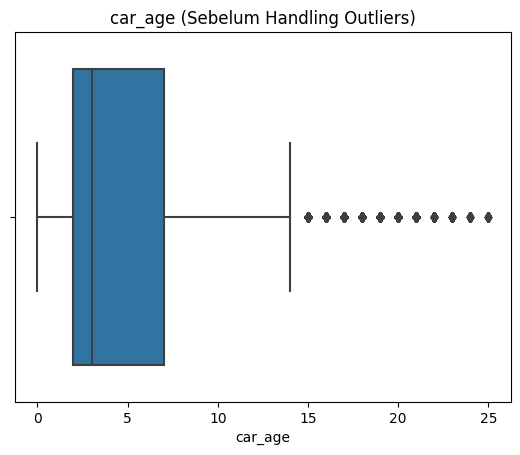

In [ ]:
sns.boxplot(x=df['car_age'])
plt.title('car_age (Sebelum Handling Outliers)');

In [ ]:
# car_age menggunakan standarisasi (distribusinya sudah mendekati normal)
df['car_age'] = StandardScaler().fit_transform(df['car_age'].values.reshape(len(df), 1))

In [ ]:
df['car_age']

2        -0.982551
3        -1.253561
7        -1.253561
8        -1.253561
9        -0.982551
            ...   
558806   -1.253561
558807   -0.440530
558808   -0.440530
558809   -1.253561
558810   -0.982551
Name: car_age, Length: 506873, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506873 entries, 2 to 558810
Data columns (total 53 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sellingprice         506873 non-null  int64  
 1   odometer_norm        506873 non-null  float64
 2   condition_std        506873 non-null  float64
 3   is_manual            506873 non-null  uint8  
 4   make_bmw             506873 non-null  uint8  
 5   make_chevrolet       506873 non-null  uint8  
 6   make_dodge           506873 non-null  uint8  
 7   make_ford            506873 non-null  uint8  
 8   make_honda           506873 non-null  uint8  
 9   make_hyundai         506873 non-null  uint8  
 10  make_kia             506873 non-null  uint8  
 11  make_nissan          506873 non-null  uint8  
 12  make_toyota          506873 non-null  uint8  
 13  body_cab             506873 non-null  uint8  
 14  body_convertible     506873 non-null  uint8  
 15  body_coupe       

Kolom feature tambahan yang bisa menjadi feature antara lain:
- Fuel
- Accident History
- Dealership's Reputation
- Vehicle Tax
- Car Assurance
- Service History
- Usage
- Sell Location
- Grouping car_condition, bisa dilakukan encoding lagi
- Extraksi saledate menjadi year_sold,month,dan date bisa digunakan untuk time series trend atau forecast

Reference: https://www.autoremarketing.com/trends/features-info-used-car-buyers-want-most

#Stage 3
---

##Split Data Train & Test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506873 entries, 2 to 558810
Data columns (total 53 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sellingprice         506873 non-null  int64  
 1   odometer_norm        506873 non-null  float64
 2   condition_std        506873 non-null  float64
 3   is_manual            506873 non-null  uint8  
 4   make_bmw             506873 non-null  uint8  
 5   make_chevrolet       506873 non-null  uint8  
 6   make_dodge           506873 non-null  uint8  
 7   make_ford            506873 non-null  uint8  
 8   make_honda           506873 non-null  uint8  
 9   make_hyundai         506873 non-null  uint8  
 10  make_kia             506873 non-null  uint8  
 11  make_nissan          506873 non-null  uint8  
 12  make_toyota          506873 non-null  uint8  
 13  body_cab             506873 non-null  uint8  
 14  body_convertible     506873 non-null  uint8  
 15  body_coupe       

In [ ]:
#fitur = ['year_sold', 'month', 'date', 'day', ]
#df = df.drop(fitur, axis=1)

In [ ]:
df.to_csv('Finpro-Clean.csv', index=False)

In [ ]:
X = df[['car_age', 'odometer_norm',
       'condition_std', 'is_manual', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_ford', 'make_honda', 'make_hyundai', 'make_kia',
       'make_nissan', 'make_toyota', 'body_cab', 'body_convertible',
       'body_coupe', 'body_hatchback', 'body_sedan', 'body_suv', 'body_van',
       'body_wagon', 'color_black', 'color_blue', 'color_burgundy',
       'color_gold', 'color_gray', 'color_green', 'color_red', 'color_silver',
       'color_white', 'model_3 series', 'model_accord', 'model_altima',
       'model_camry', 'model_escape', 'model_f-150', 'model_focus',
       'model_fusion', 'model_grand caravan', 'trim_base', 'trim_gls',
       'trim_le', 'trim_limited', 'trim_ls', 'trim_lt', 'trim_lx', 'trim_se',
       'trim_xlt']].copy()
y = df[['sellingprice']].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [ ]:
X_train

,car_age,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,make_dodge,make_ford,make_honda,make_hyundai,...,model_grand caravan,trim_base,trim_gls,trim_le,trim_limited,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt
360265,0.914523,0.415618,1.035217,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
365077,-0.440530,0.166970,1.357064,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201784,-0.440530,0.114987,-0.466734,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245620,1.456544,0.649533,-1.432275,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
287131,0.372502,0.216214,-0.037605,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500043,1.456544,0.491875,0.069677,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527895,0.643512,0.503694,-0.788581,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
239490,-0.711540,0.183366,0.284241,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1143,-0.711540,0.141216,0.927935,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_test

,car_age,odometer_norm,condition_std,is_manual,make_bmw,make_chevrolet,make_dodge,make_ford,make_honda,make_hyundai,...,model_grand caravan,trim_base,trim_gls,trim_le,trim_limited,trim_ls,trim_lt,trim_lx,trim_se,trim_xlt
482250,-0.711540,0.186949,1.357064,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15290,0.372502,0.658476,-1.539557,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
267482,-0.440530,0.173695,0.927935,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471524,2.540586,0.177465,-0.574017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
496635,-1.253561,0.096079,1.571629,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76307,-0.169519,0.142130,-1.432275,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174894,-0.440530,0.107246,1.035217,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
476524,0.643512,0.400445,0.176959,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
386135,-1.253561,0.074877,0.713370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modeling & Evaluation

In [ ]:
# Fungsi Evaluasi Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_metrics_evaluation(model, y_pred, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_test, y_pred, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
  print('R2: '+ str(r2_score(y_test, y_pred)))

def train_metrics_evaluation(model, y_pred_train, X_train, X_test, y_train, y_test):
  print('RMSE: '+ str(mean_squared_error(y_train, y_pred_train, squared = False)))
  print('MAE: '+ str(mean_absolute_error(y_train, y_pred_train)))
  print('R2: '+ str(r2_score(y_train, y_pred_train)))

def show_feature_importance(model):
  feature_importance = pd.Series(model.feature_importances_, index=X.columns)
  ax = feature_importance.nlargest(25).plot(kind='barh', figsize=(10,8))
  ax.invert_yaxis()
  plt.xlabel('Score')
  plt.ylabel('Features')
  plt.title('Feature Importance Score')

def show_best_hyperparameter(model, hyperparameters):
  for key, value in hyperparameters.items():
    print('Best '+key+':', model.get_params()[key])

###Linear Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Inisialisasi model
regressor = LinearRegression()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean()}
evaluation_df = evaluation_df.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df)

Hasil Evaluasi tiap fold:
        Fold     RMSE      MAE   R^2
0          1 4087.222 3098.055 0.714
1          2 4097.344 3101.993 0.712
2          3 4085.825 3094.849 0.715
3          4 4084.543 3102.657 0.713
4          5 4100.881 3097.620 0.711
5  Rata-rata 4091.163 3099.035 0.713


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Inisialisasi model
regressor = LinearRegression()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, dan MAPE
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, dan MAPE
rmse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=r2_scorer)

# Gunakan cross_val_predict untuk mendapatkan prediksi yang digunakan untuk menghitung MAPE
y_pred = cross_val_predict(regressor, X_train, y_train, cv=5)
mape_score = mean_absolute_percentage_error(y_train, y_pred)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': [mape_score] * 5}
evaluation_df = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_score}
evaluation_df = evaluation_df.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df)


Hasil Evaluasi tiap fold:
        Fold         RMSE          MAE       R^2       MAPE
0          1  4087.222336  3098.055088  0.714242  50.761462
1          2  4097.343695  3101.992900  0.711826  50.761462
2          3  4085.825051  3094.849364  0.714867  50.761462
3          4  4084.542990  3102.656612  0.713351  50.761462
4          5  4100.881129  3097.620355  0.711130  50.761462
5  Rata-rata  4091.163040  3099.034864  0.713083  50.761462


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Inisialisasi model
regressor = LinearRegression()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, dan MAPE
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, dan MAPE
rmse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=r2_scorer)

# Gunakan cross_val_predict untuk mendapatkan prediksi yang digunakan untuk menghitung MAPE
y_pred = cross_val_predict(regressor, X_train, y_train, cv=5)
mape_score = mean_absolute_percentage_error(y_train, y_pred)

# Hitung akurasi sebagai 100 - MAPE
accuracy_scores = 100 - mape_score

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': [mape_score] * 5, 'Accuracy': [accuracy_scores] * 5}
evaluation_df = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_score, 'Accuracy': accuracy_scores}
evaluation_df = evaluation_df.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df)


Hasil Evaluasi tiap fold:
        Fold         RMSE          MAE       R^2       MAPE   Accuracy
0          1  4087.222336  3098.055088  0.714242  50.761462  49.238538
1          2  4097.343695  3101.992900  0.711826  50.761462  49.238538
2          3  4085.825051  3094.849364  0.714867  50.761462  49.238538
3          4  4084.542990  3102.656612  0.713351  50.761462  49.238538
4          5  4100.881129  3097.620355  0.711130  50.761462  49.238538
5  Rata-rata  4091.163040  3099.034864  0.713083  50.761462  49.238538


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Accuracy (1 - MAPE)
def accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 1 - mape/100

# Inisialisasi model
regressor = LinearRegression()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, MAPE, dan Akurasi
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
accuracy_scorer = make_scorer(accuracy, greater_is_better=True)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, MAPE, dan Akurasi
rmse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=r2_scorer)
mape_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mape_scorer)
accuracy_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': mape_scores, 'Accuracy': accuracy_scores}
evaluation_df = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_scores.mean(), 'Accuracy': accuracy_scores.mean()}
evaluation_df = evaluation_df.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df)


Hasil Evaluasi tiap fold:
        Fold         RMSE          MAE       R^2       MAPE  Accuracy
0          1  4087.222336  3098.055088  0.714242 -50.078538  0.499215
1          2  4097.343695  3101.992900  0.711826 -50.408565  0.495914
2          3  4085.825051  3094.849364  0.714867 -51.485198  0.485148
3          4  4084.542990  3102.656612  0.713351 -50.788764  0.492112
4          5  4100.881129  3097.620355  0.711130 -51.046248  0.489538
5  Rata-rata  4091.163040  3099.034864  0.713083 -50.761463  0.492385


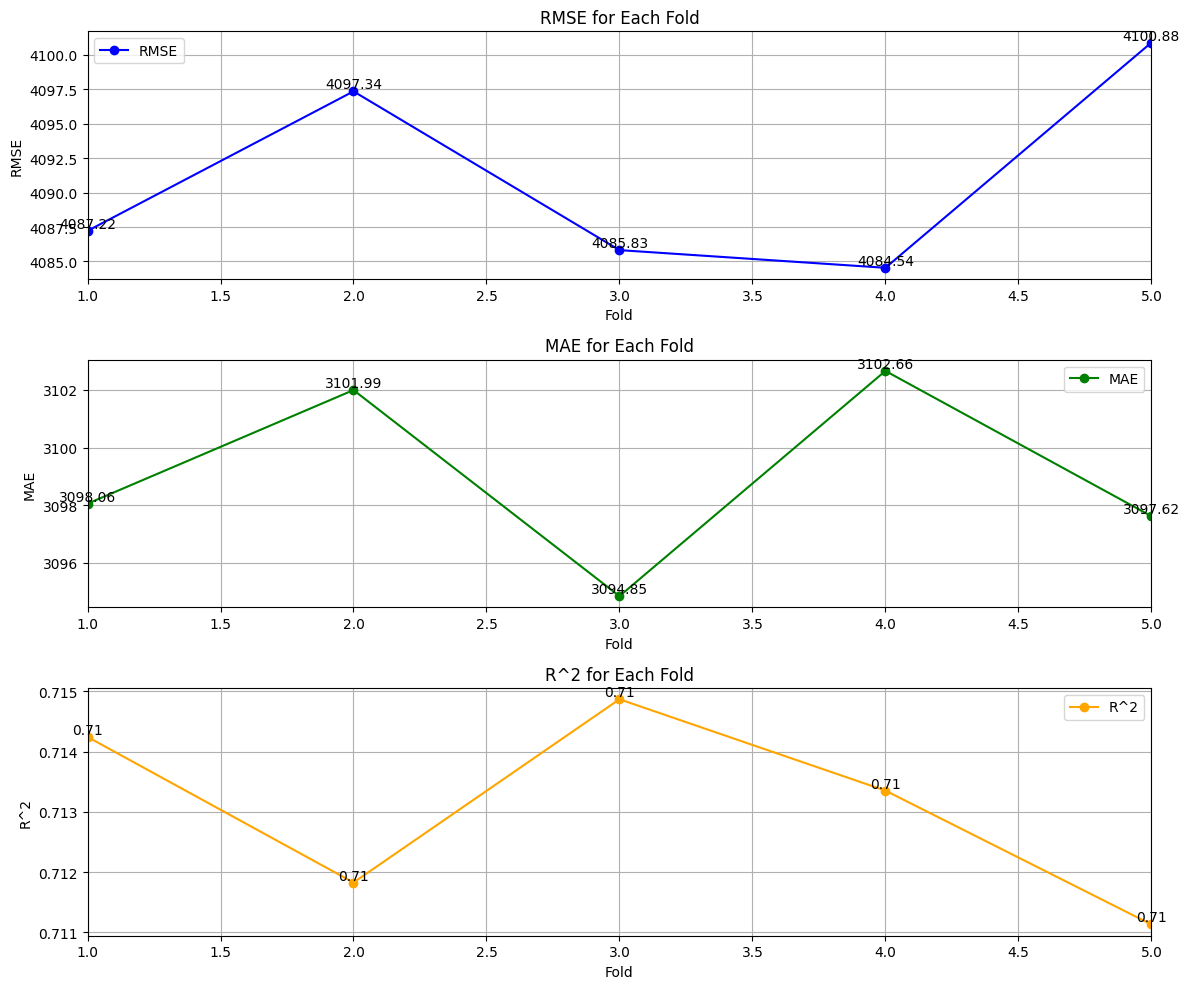

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df['Fold'] = pd.to_numeric(evaluation_df['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df['Fold'], evaluation_df['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df['RMSE']):
    axs[0].text(evaluation_df['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df['Fold'], evaluation_df['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df['MAE']):
    axs[1].text(evaluation_df['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df['Fold'], evaluation_df['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df['R^2']):
    axs[2].text(evaluation_df['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
regressor.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = regressor.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 4095.956687124094
MAE: 3099.8103224463352
R^2: 0.7111461151706353


In [ ]:
print('Train Accuracy: ', r2_scores.mean())
print('Test Accuracy: ', r2_test)

Train Accuracy:  0.7130832969747607
Test Accuracy:  0.7111461151706353


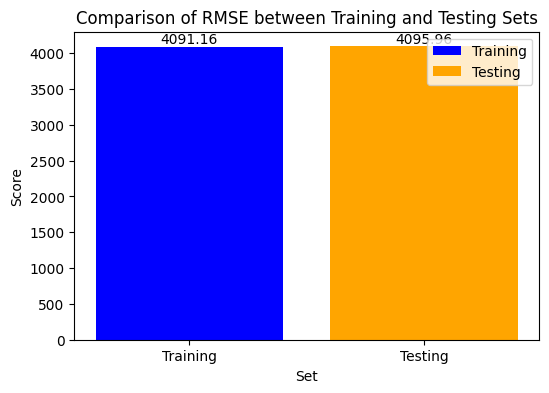

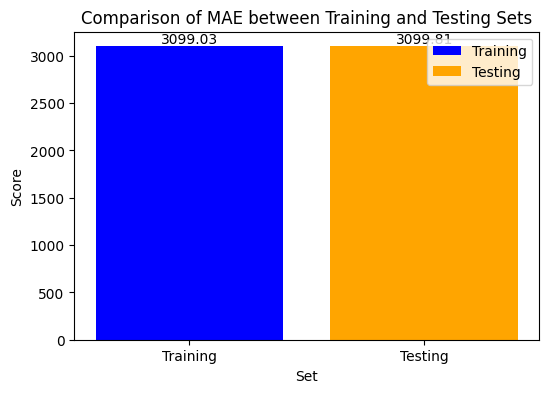

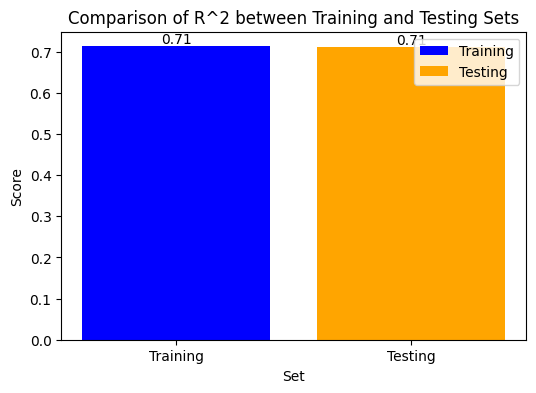

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df = pd.DataFrame(data_train)
evaluation_test_df = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df.loc[evaluation_train_df['Metric'] == metric]
    test_row = evaluation_test_df.loc[evaluation_test_df['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


Dari evaluasi tersebut maka hasil dapat digolongkan sebagai Good Fit karena memiliki perbedaan akurasi Train dan Test yang tidak begitu besar

### Ridge Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge

# Inisialisasi model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_ridge = pd.DataFrame(data)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df_ridge)


Hasil Evaluasi tiap fold:
   Fold     RMSE      MAE   R^2
0     1 4087.228 3098.067 0.714
1     2 4097.351 3102.003 0.712
2     3 4085.821 3094.856 0.715
3     4 4084.536 3102.657 0.713
4     5 4100.888 3097.637 0.711


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Inisialisasi model Ridge
ridge_model = Ridge()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, MAPE, dan Accuracy
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, dan MAPE
rmse_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Gunakan cross_val_predict untuk mendapatkan prediksi yang digunakan untuk menghitung MAPE
y_pred = cross_val_predict(ridge_model, X_train, y_train, cv=5)
mape_score = mean_absolute_percentage_error(y_train, y_pred)

# Hitung akurasi sebagai 100 - MAPE
accuracy_scores = 100 - mape_score

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': [mape_score] * 5, 'Accuracy': [accuracy_scores] * 5}
evaluation_df_ridge = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_score, 'Accuracy': accuracy_scores}
evaluation_df_ridge = evaluation_df_ridge.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df_ridge)


Hasil Evaluasi tiap fold:
        Fold         RMSE          MAE       R^2       MAPE   Accuracy
0          1  4087.228311  3098.067305  0.714241  50.759142  49.240858
1          2  4097.350645  3102.002640  0.711825  50.759142  49.240858
2          3  4085.821175  3094.855987  0.714868  50.759142  49.240858
3          4  4084.536353  3102.657484  0.713352  50.759142  49.240858
4          5  4100.887793  3097.636528  0.711129  50.759142  49.240858
5  Rata-rata  4091.164855  3099.043989  0.713083  50.759142  49.240858


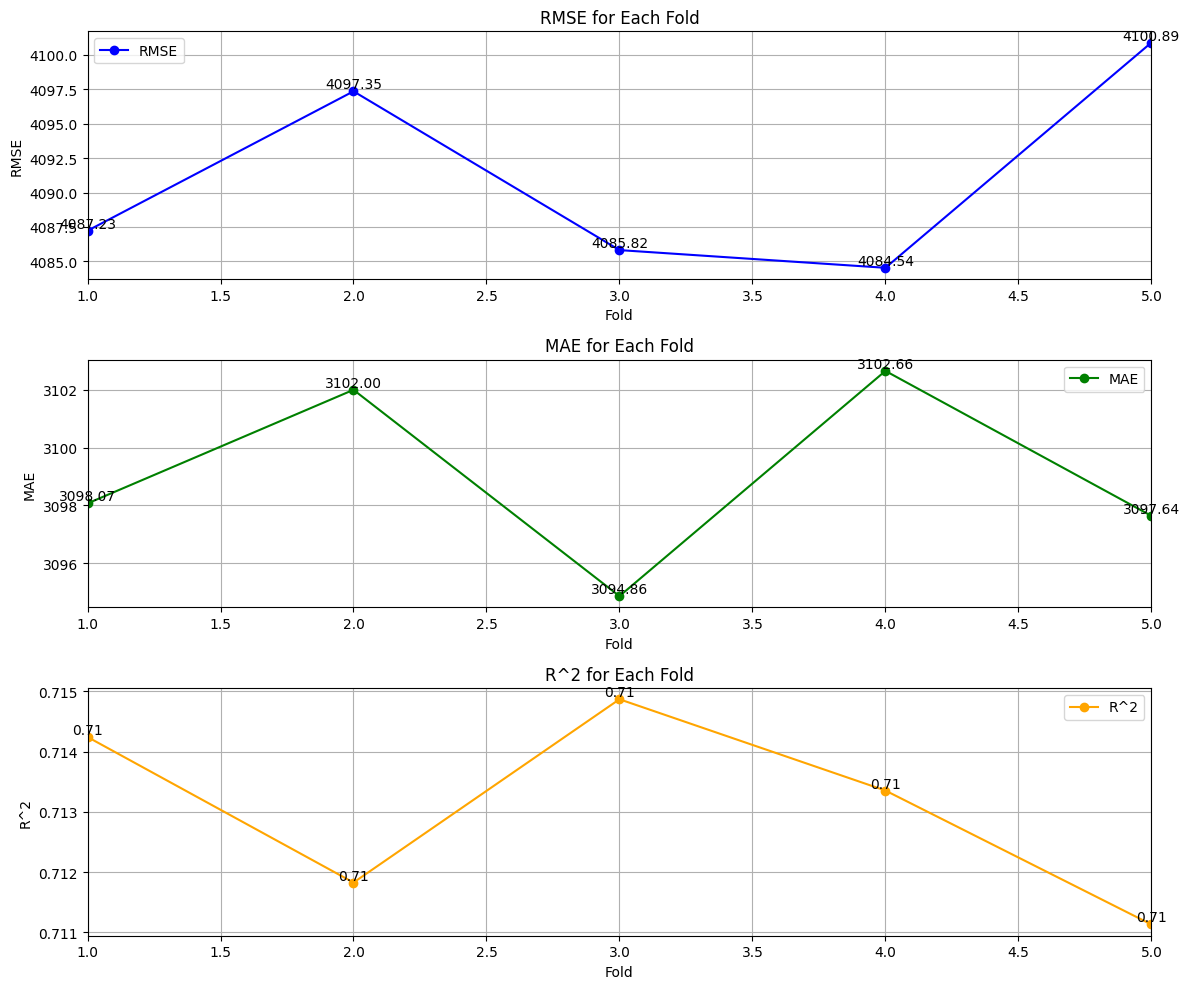

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_ridge['Fold'] = pd.to_numeric(evaluation_df_ridge['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_ridge['Fold'], evaluation_df_ridge['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_ridge['RMSE']):
    axs[0].text(evaluation_df_ridge['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_ridge['Fold'], evaluation_df_ridge['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_ridge['MAE']):
    axs[1].text(evaluation_df_ridge['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_ridge['Fold'], evaluation_df_ridge['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_ridge['R^2']):
    axs[2].text(evaluation_df_ridge['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
ridge_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = ridge_model.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 4095.974317432532
MAE: 3099.832992985282
R^2: 0.7111436285261552


In [ ]:
# Hitung rata-rata dari masing-masing metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

print(f"Average RMSE: {avg_rmse}")
print(f"Average MAE: {avg_mae}")
print(f"Average R^2: {avg_r2}")

Average RMSE: 4091.1648553127234
Average MAE: 3099.0439886174418
Average R^2: 0.7130830411128594


In [ ]:
print('Train Accuracy: ', avg_r2)
print('Test Accuracy: ', ridge_model.score(X_test, y_test))

Train Accuracy:  0.7130830411128594
Test Accuracy:  0.7111436285261552


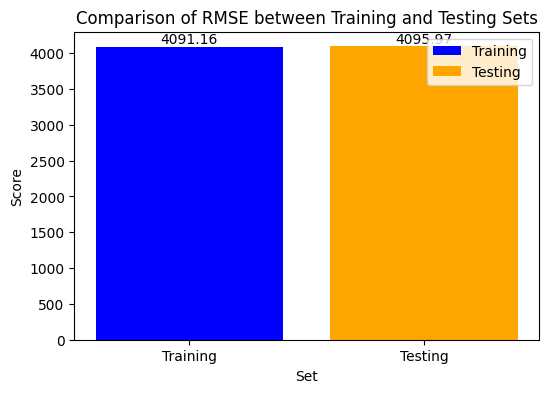

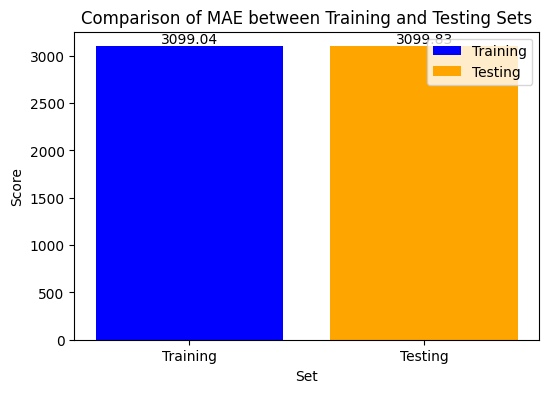

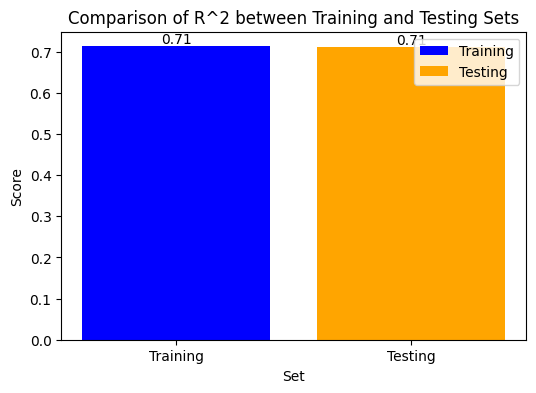

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df1 = pd.DataFrame(data_train)
evaluation_test_df2 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df1.loc[evaluation_train_df1['Metric'] == metric]
    test_row = evaluation_test_df2.loc[evaluation_test_df2['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


Dari evaluasi tersebut maka hasil dapat digolongkan sebagai Good Fit karena memiliki perbedaan akurasi Train dan Test yang tidak begitu besar

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

alpha = [0.001, 0.01]
solver = ['auto', 'cholesky', 'lsqr']
hyperparameters = dict(alpha=alpha, solver=solver)

from sklearn.linear_model import Ridge
ridge = Ridge()
rs = RandomizedSearchCV(ridge, hyperparameters, scoring='r2', cv=5, random_state=42)
rs_tuned = rs.fit(X_train, y_train)

# Predict & Evaluation
y_pred = rs_tuned.predict(X_test)
test_metrics_evaluation(rs, y_pred, X_train, y_train, X_test, y_test)

RMSE: 4095.956851963587
MAE: 3099.810534138401
R2: 0.7111460919211077


### Lasso

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso

# Inisialisasi model
lasso_model = Lasso()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_lasso = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_lasso = pd.concat([evaluation_df_lasso, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_lasso)

      Fold     RMSE      MAE   R^2
0        1 4089.431 3100.083 0.714
1        2 4099.394 3103.998 0.712
2        3 4087.509 3096.429 0.715
3        4 4086.310 3103.975 0.713
4        5 4102.886 3099.357 0.711
5  Average 4093.106 3100.768 0.713


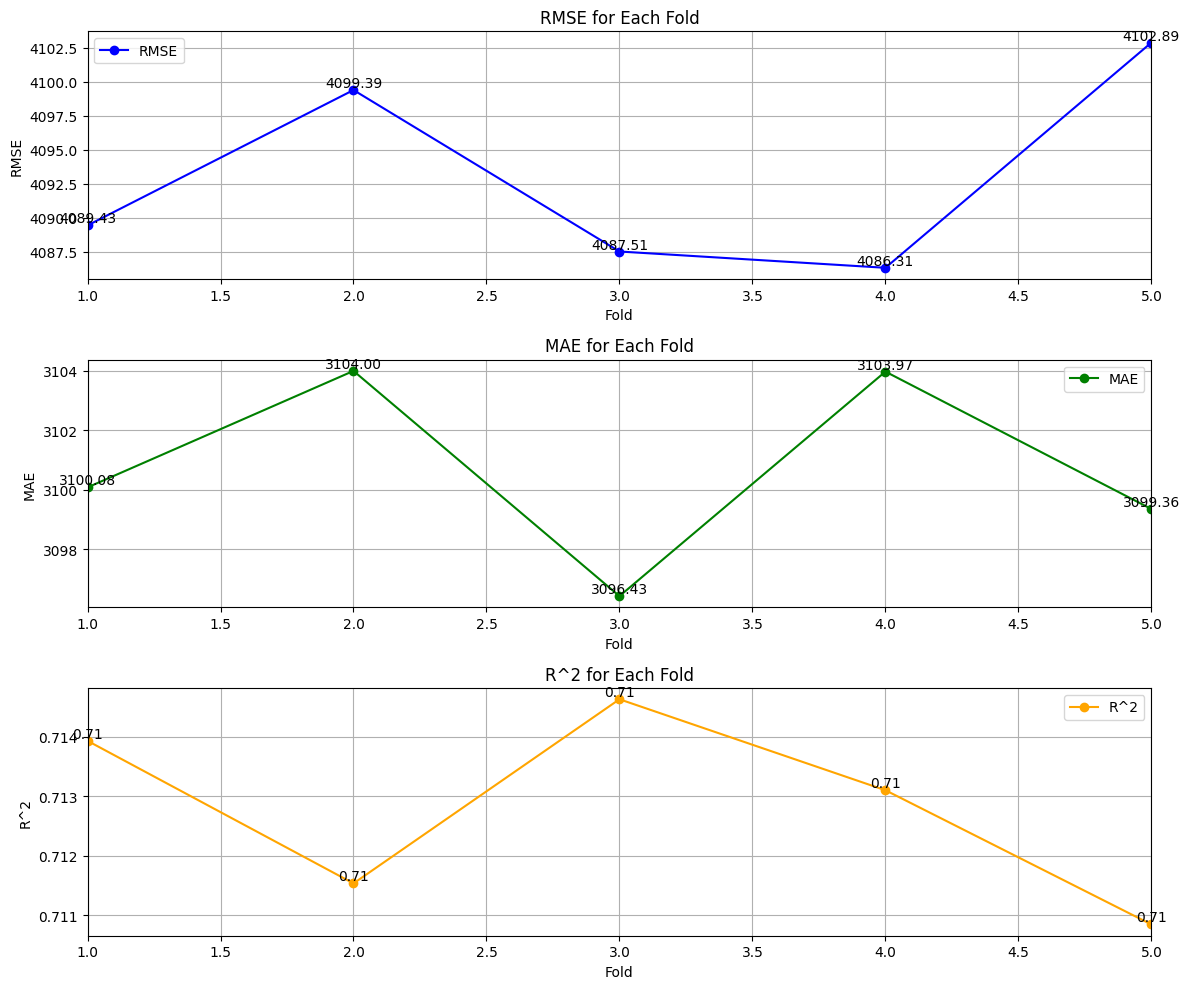

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_lasso['Fold'] = pd.to_numeric(evaluation_df_lasso['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_lasso['Fold'], evaluation_df_lasso['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_lasso['RMSE']):
    axs[0].text(evaluation_df_lasso['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_lasso['Fold'], evaluation_df_lasso['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_lasso['MAE']):
    axs[1].text(evaluation_df_lasso['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_lasso['Fold'], evaluation_df_lasso['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_lasso['R^2']):
    axs[2].text(evaluation_df_lasso['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
lasso_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = lasso_model.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 4098.366410260312
MAE: 3102.1873076049633
R^2: 0.7108061395830131


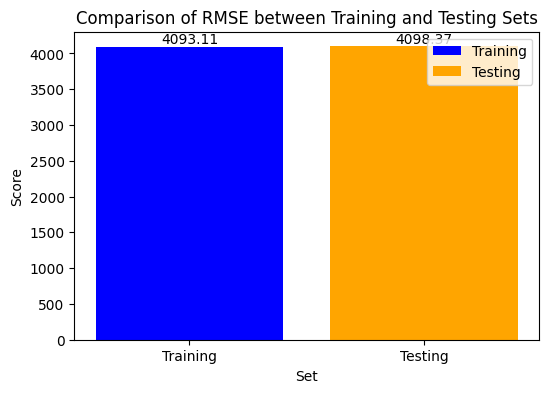

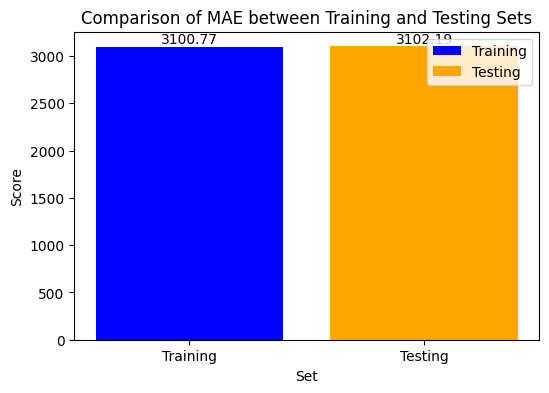

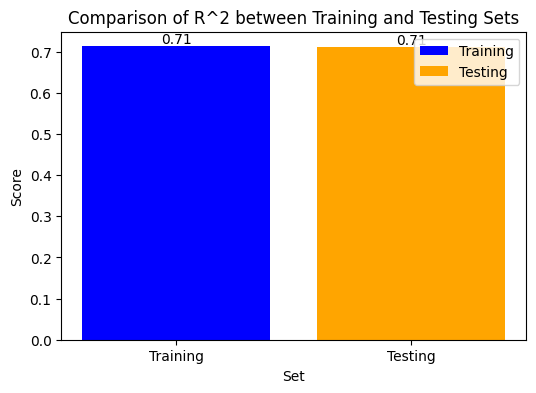

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df3 = pd.DataFrame(data_train)
evaluation_test_df4 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df3.loc[evaluation_train_df1['Metric'] == metric]
    test_row = evaluation_test_df4.loc[evaluation_test_df2['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


Dari evaluasi tersebut maka hasil dapat digolongkan sebagai Good Fit karena memiliki perbedaan akurasi Train dan Test yang tidak begitu besar

### ElasticNet

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import ElasticNet

# Inisialisasi model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(elasticnet_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(elasticnet_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(elasticnet_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_elasticnet = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_elasticnet = pd.concat([evaluation_df_elasticnet, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_elasticnet)

      Fold     RMSE      MAE   R^2
0        1 5371.406 4207.775 0.506
1        2 5362.650 4194.065 0.506
2        3 5377.273 4209.909 0.506
3        4 5351.644 4195.602 0.508
4        5 5370.802 4203.689 0.505
5  Average 5366.755 4202.208 0.506


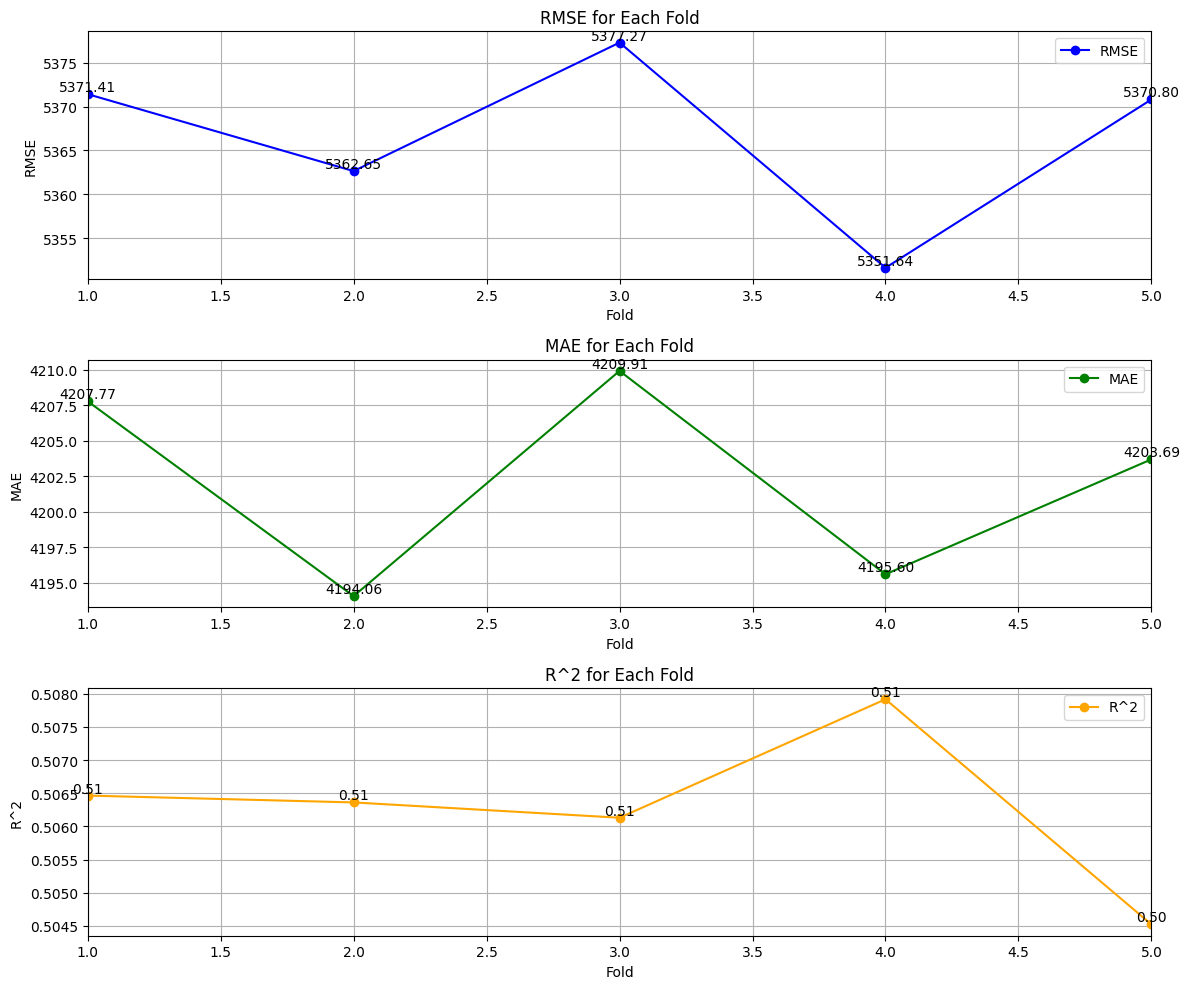

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_elasticnet['Fold'] = pd.to_numeric(evaluation_df_elasticnet['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_elasticnet['Fold'], evaluation_df_elasticnet['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_elasticnet['RMSE']):
    axs[0].text(evaluation_df_elasticnet['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_elasticnet['Fold'], evaluation_df_elasticnet['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_elasticnet['MAE']):
    axs[1].text(evaluation_df_elasticnet['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_elasticnet['Fold'], evaluation_df_elasticnet['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_elasticnet['R^2']):
    axs[2].text(evaluation_df_elasticnet['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
elasticnet_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = elasticnet_model.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 5355.506146257852
MAE: 4187.769301101679
R^2: 0.5061801469764802


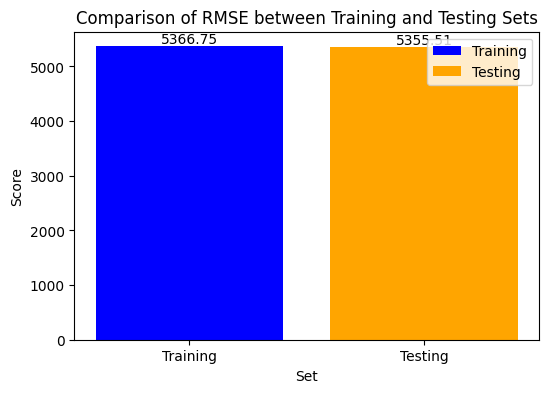

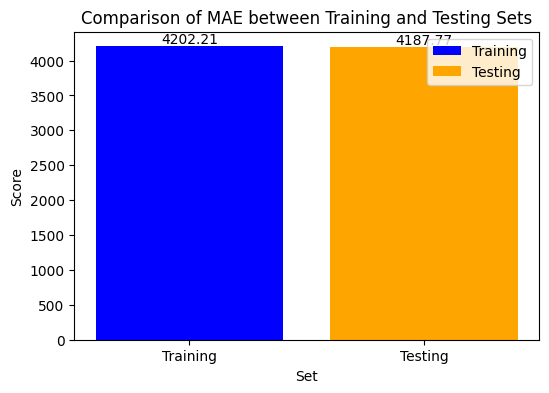

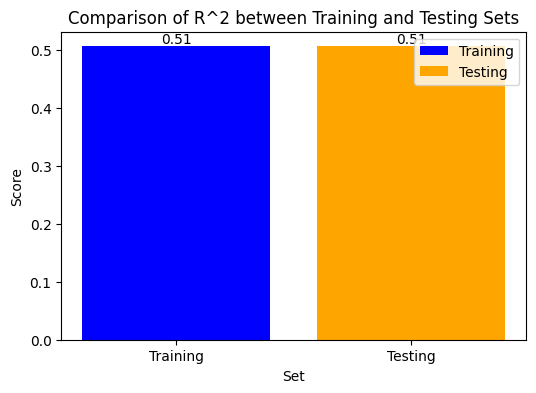

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df5 = pd.DataFrame(data_train)
evaluation_test_df6 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df5.loc[evaluation_train_df5['Metric'] == metric]
    test_row = evaluation_test_df6.loc[evaluation_test_df6['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


Dari evaluasi tersebut maka hasil dapat digolongkan sebagai over fit. Model terlalu baik dalam mempelajari data tetapi tidak begitu diuji.

###Bayesian Ridge Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import BayesianRidge

# Inisialisasi model Bayesian Ridge Regressor
bayesianridge_model = BayesianRidge()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(bayesianridge_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(bayesianridge_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(bayesianridge_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_bayesianridge = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_bayesianridge = pd.concat([evaluation_df_bayesianridge, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_bayesianridge)

      Fold         RMSE          MAE       R^2
0        1  4087.225473  3098.062107  0.714241
1        2  4097.347403  3101.998359  0.711825
2        3  4085.822306  3094.852892  0.714867
3        4  4084.538575  3102.656854  0.713352
4        5  4100.884677  3097.629900  0.711130
5  Average  4091.163687  3099.040022  0.713083


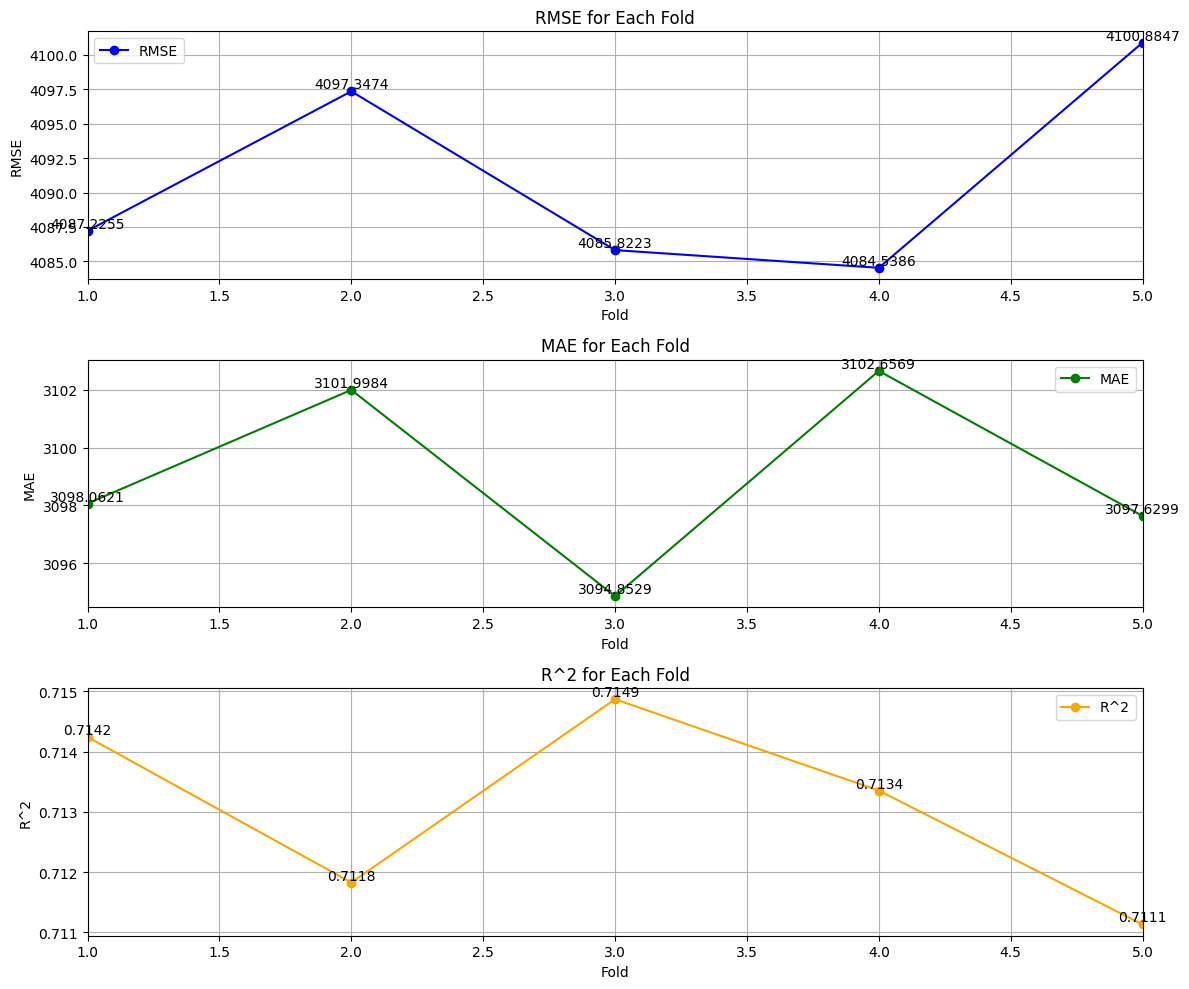

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_bayesianridge['Fold'] = pd.to_numeric(evaluation_df_bayesianridge['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_bayesianridge['Fold'], evaluation_df_bayesianridge['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_bayesianridge['RMSE']):
    axs[0].text(evaluation_df_bayesianridge['Fold'][i], txt, f'{txt:.4f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_bayesianridge['Fold'], evaluation_df_bayesianridge['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_bayesianridge['MAE']):
    axs[1].text(evaluation_df_bayesianridge['Fold'][i], txt, f'{txt:.4f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_bayesianridge['Fold'], evaluation_df_bayesianridge['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_bayesianridge['R^2']):
    axs[2].text(evaluation_df_bayesianridge['Fold'][i], txt, f'{txt:.4f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
bayesianridge_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = bayesianridge_model.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 4095.966912538456
MAE: 3099.8233509225547
R^2: 0.7111446729413466


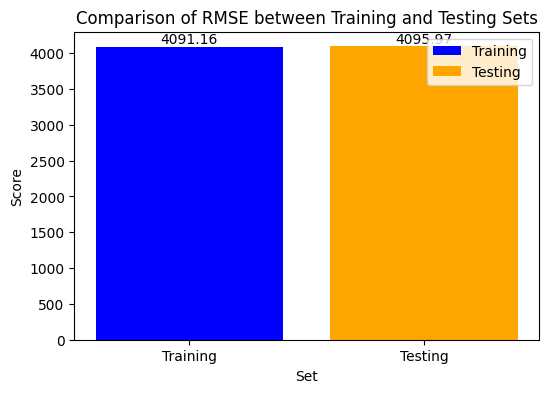

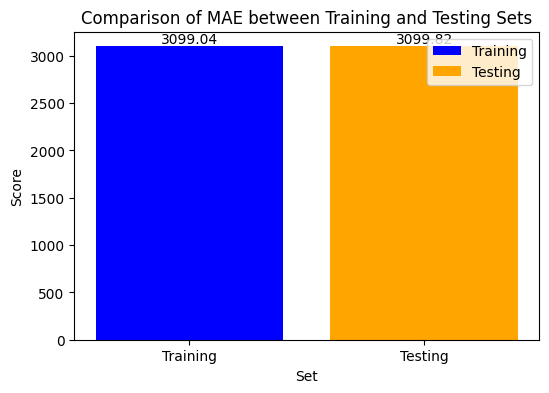

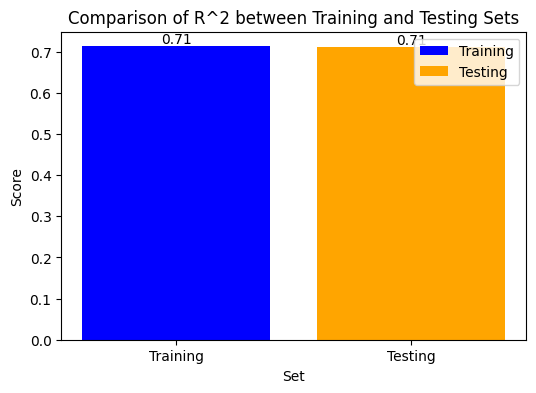

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df5 = pd.DataFrame(data_train)
evaluation_test_df6 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df5.loc[evaluation_train_df5['Metric'] == metric]
    test_row = evaluation_test_df6.loc[evaluation_test_df6['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


###Decision Tree Model

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model Decision Tree
dt_model = DecisionTreeRegressor()

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_dt = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_dt = pd.concat([evaluation_df_dt, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_dt)

      Fold         RMSE          MAE       R^2
0        1  4647.858235  3032.315966  0.630606
1        2  4667.077637  3039.661467  0.626001
2        3  4641.333250  3027.703101  0.633779
3        4  4661.834330  3035.501258  0.626575
4        5  4645.064401  3020.232229  0.628462
5  Average  4652.633571  3031.082804  0.629084


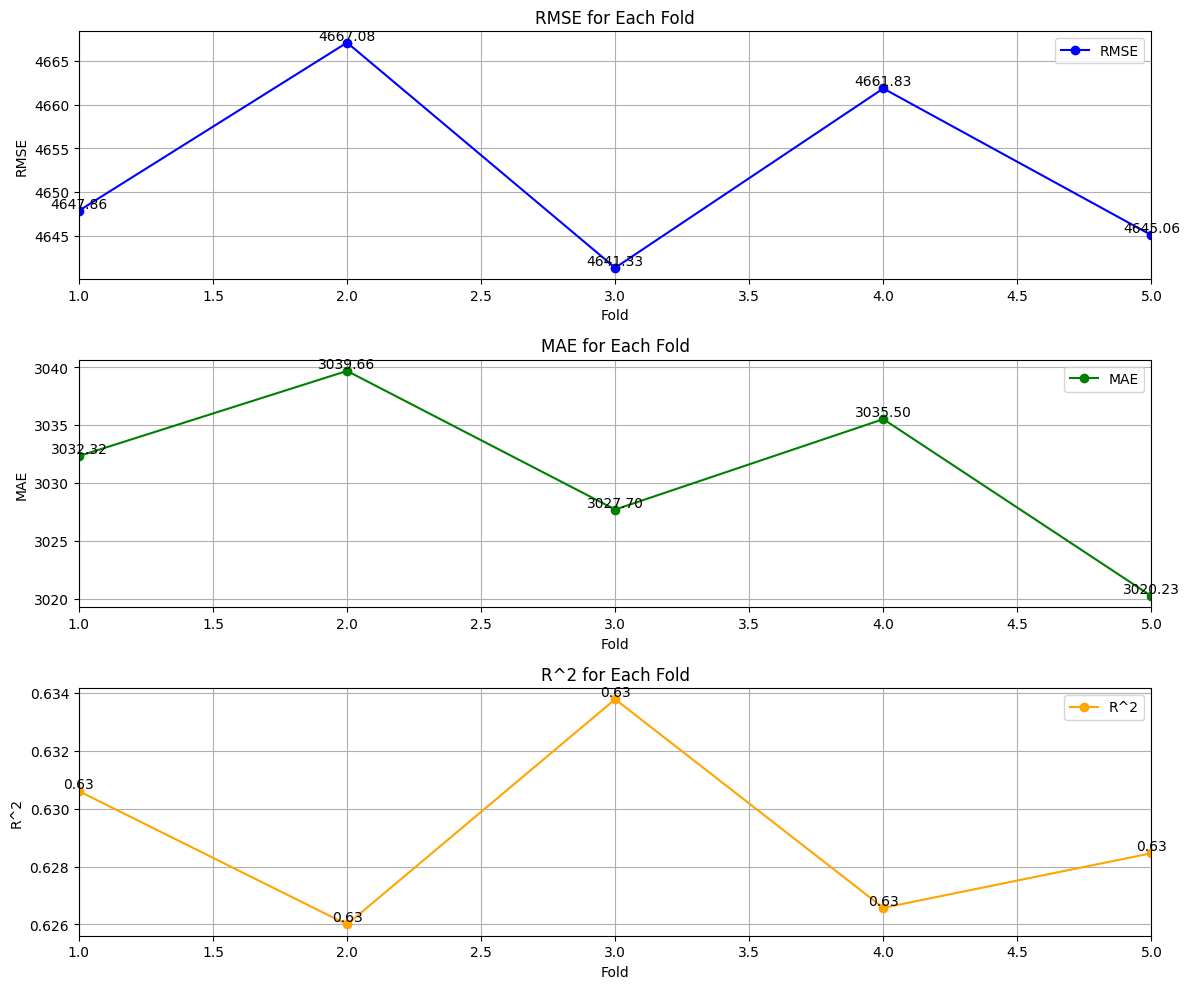

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_dt['Fold'] = pd.to_numeric(evaluation_df_dt['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_dt['Fold'], evaluation_df_dt['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_dt['RMSE']):
    axs[0].text(evaluation_df_dt['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_dt['Fold'], evaluation_df_dt['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_dt['MAE']):
    axs[1].text(evaluation_df_dt['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_dt['Fold'], evaluation_df_dt['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_dt['R^2']):
    axs[2].text(evaluation_df_dt['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melatih model pada seluruh data pelatihan
dt_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = dt_model.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 4627.016081321738
MAE: 3012.5932166050143
R^2: 0.6313879574137451


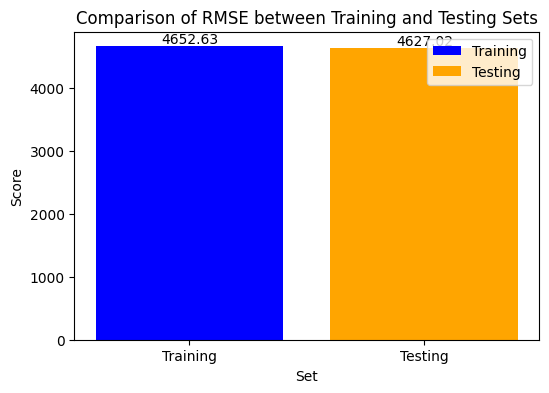

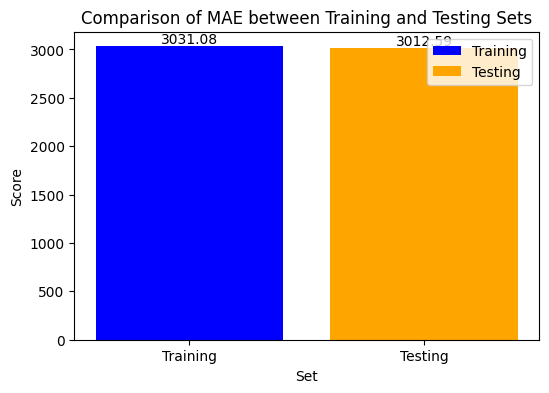

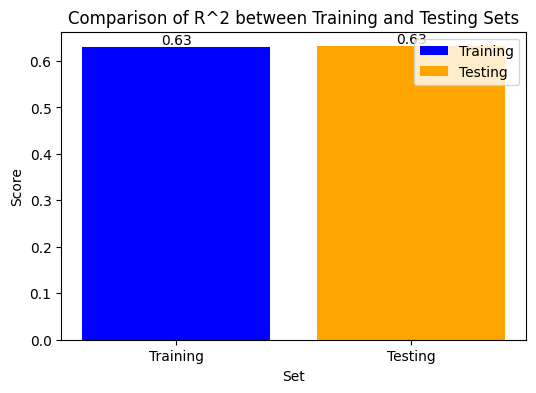

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df7 = pd.DataFrame(data_train)
evaluation_test_df8 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df7.loc[evaluation_train_df7['Metric'] == metric]
    test_row = evaluation_test_df8.loc[evaluation_test_df8['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()


In [ ]:
#Dengan Data Test
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
test_metrics_evaluation(dt_model, y_pred, X_train, X_test, y_train, y_test)

Dari hasil evaluasi diatas, maka menunjukan hasil yang overfitt dimana model terlalu 'mempelajari' model tetapi ketika diuji memiliki hasil yang berbeda

###XGBoost Modeling

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Inisialisasi model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_xgboost = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_xgboost = pd.concat([evaluation_df_xgboost, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_xgboost)

      Fold     RMSE      MAE   R^2
0        1 3341.807 2294.036 0.809
1        2 3356.850 2303.232 0.807
2        3 3323.738 2282.358 0.811
3        4 3337.602 2303.732 0.809
4        5 3357.472 2292.215 0.806
5  Average 3343.494 2295.115 0.808


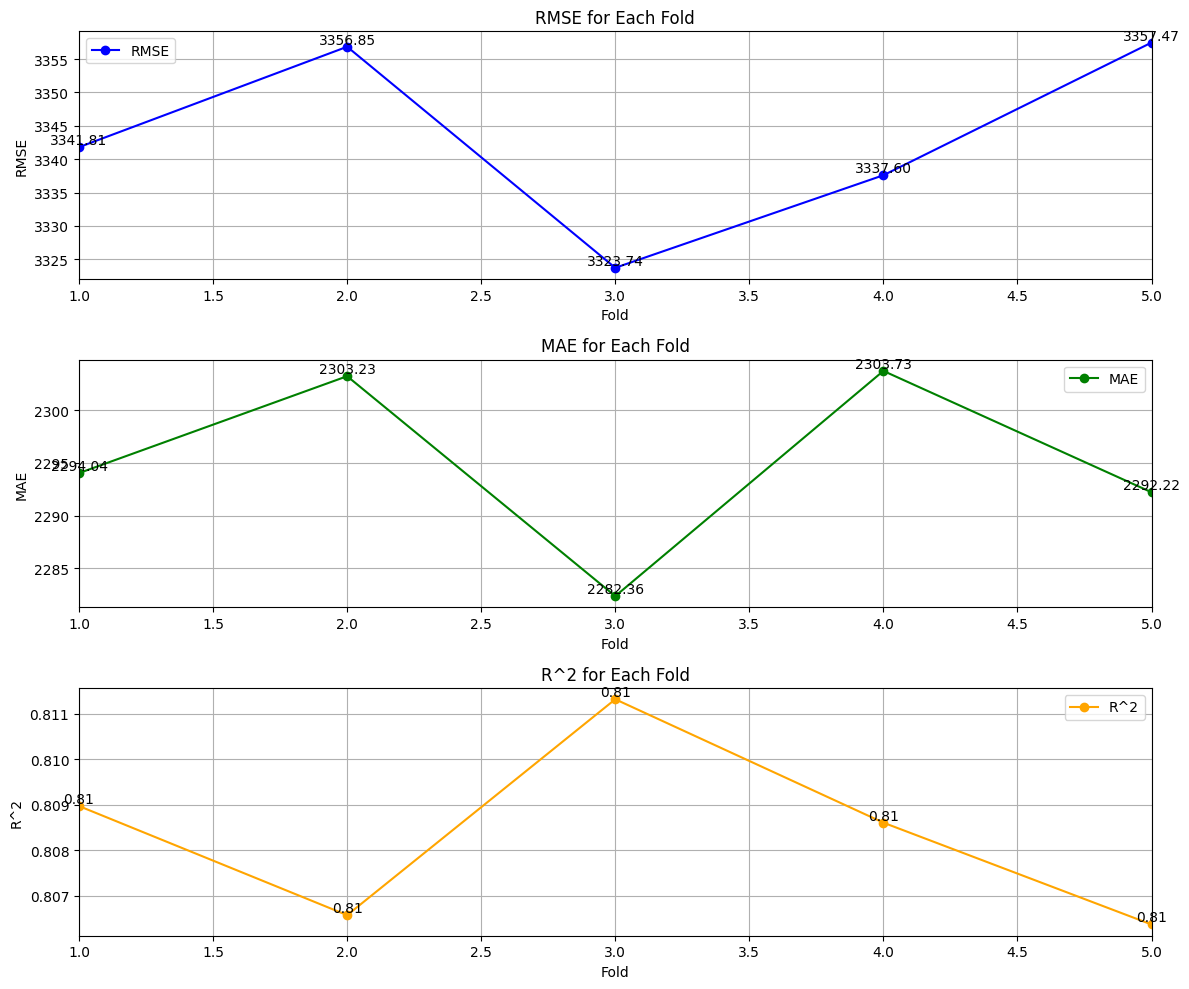

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_xgboost['Fold'] = pd.to_numeric(evaluation_df_xgboost['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_xgboost['Fold'], evaluation_df_xgboost['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_xgboost['RMSE']):
    axs[0].text(evaluation_df_xgboost['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_xgboost['Fold'], evaluation_df_xgboost['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_xgboost['MAE']):
    axs[1].text(evaluation_df_xgboost['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_xgboost['Fold'], evaluation_df_xgboost['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_xgboost['R^2']):
    axs[2].text(evaluation_df_xgboost['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Latih model pada seluruh data pelatihan
xgb_model.fit(X_train, y_train)

# Buat prediksi pada data uji
y_pred_test = xgb_model.predict(X_test)

# Hitung RMSE, MAE, dan R2 pada data uji
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Cetak hasil metrik pada data uji
print(f"RMSE on Test Data: {rmse_test}")
print(f"MAE on Test Data: {mae_test}")
print(f"R^2 on Test Data: {r2_test}")

RMSE on Test Data: 3340.3676001314457
MAE on Test Data: 2291.053965880951
R^2 on Test Data: 0.8078873215837219


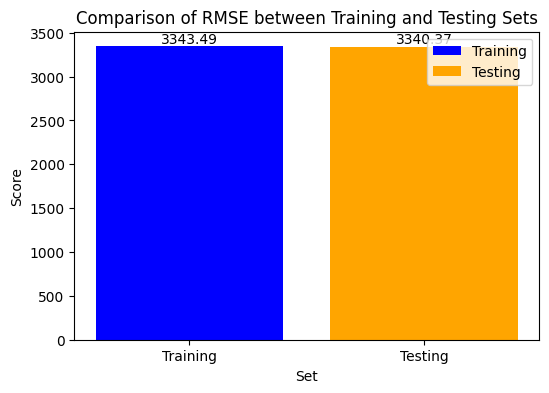

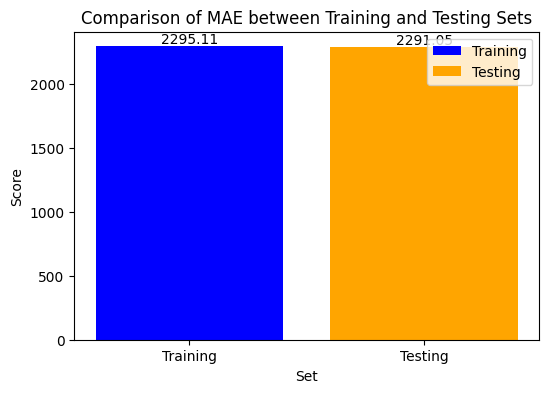

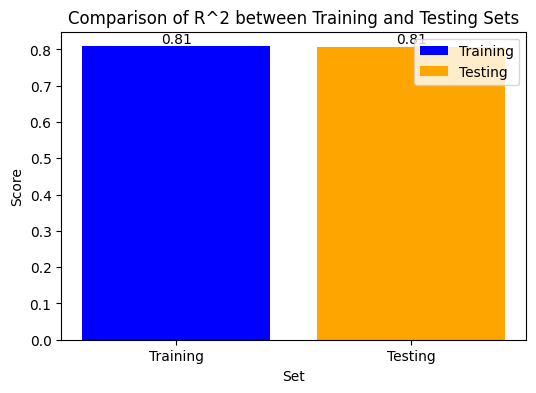

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df9 = pd.DataFrame(data_train)
evaluation_test_df10 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df9.loc[evaluation_train_df9['Metric'] == metric]
    test_row = evaluation_test_df10.loc[evaluation_test_df10['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()

### Hyperparameter Tuning

#### Tunning Lama

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the hyperparameters to search
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 200),
    'max_depth': randint(3, 5),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
}

# Create RandomizedSearchCV object with RMSE, MAE, and R^2 as scoring metrics
scorers = {
    'neg_mean_squared_error': 'neg_mean_squared_error',  # RMSE
    'neg_mean_absolute_error': 'neg_mean_absolute_error',  # MAE
    'r2_score': make_scorer(r2_score),  # R^2
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring=scorers,
    refit='neg_mean_squared_error',  # The metric to use for model selection
    n_iter=5,  # Number of parameter settings to sample
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model1 = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model1.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE on Test Set: {rmse}")
print(f"MAE on Test Set: {mae}")
print(f"R^2 on Test Set: {r2}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Hyperparameters: {'colsample_bytree': 0.8292800524865167, 'learning_rate': 0.14489853697352734, 'max_depth': 4, 'n_estimators': 170, 'subsample': 0.9072233625318481}
RMSE on Test Set: 3520.0080739238074
MAE on Test Set: 2478.884150554577
R^2 on Test Set: 0.7866685815547074


#### Tunning Baru

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the hyperparameters to search
param_dist = {
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.8, 0.2),
    'colsample_bytree': uniform(0.8, 0.2),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 1),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
}

# Create RandomizedSearchCV object with RMSE, MAE, and R^2 as scoring metrics
scorers = {
    'neg_mean_squared_error': 'neg_mean_squared_error',  # RMSE
    'neg_mean_absolute_error': 'neg_mean_absolute_error',  # MAE
    'r2_score': make_scorer(r2_score),  # R^2
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring=scorers,
    refit='neg_mean_squared_error',  # The metric to use for model selection
    n_iter=20,  # Number of parameter settings to sample
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Assume X_train, y_train, X_test, y_test are defined
# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"RMSE on Test Set: {rmse}")
print(f"MAE on Test Set: {mae}")
print(f"R^2 on Test Set: {r2}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'colsample_bytree': 0.9816546620294053, 'gamma': 0.9154992116730064, 'learning_rate': 0.15272803556695116, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 289, 'reg_alpha': 0.31829011971692267, 'reg_lambda': 0.780446670485764, 'subsample': 0.8078666600203991}
RMSE on Test Set: 3227.804665476321
MAE on Test Set: 2165.9528056445847
R^2 on Test Set: 0.8206167072180843


###LightGBM Model

In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, MAPE, dan Accuracy
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, dan MAPE
rmse_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Gunakan cross_val_predict untuk mendapatkan prediksi yang digunakan untuk menghitung MAPE
y_pred = cross_val_predict(lgb_model, X_train, y_train, cv=5)
mape_score = mean_absolute_percentage_error(y_train, y_pred)

# Hitung akurasi sebagai 100 - MAPE
accuracy_scores = 100 - mape_score

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': [mape_score] * 5, 'Accuracy': [accuracy_scores] * 5}
evaluation_df_lgb_model = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_score, 'Accuracy': accuracy_scores}
evaluation_df_lgb_model = evaluation_df_lgb_model.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df_lgb_model)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.126435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 324398, number of used features: 48
[LightGBM] [Info] Start training from score 13114.266250
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.227312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 324398, number of used features: 48
[LightGBM] [Info] Start training from score 13125.365949
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhe

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Inisialisasi model XGBoost
lgb_model = lgb.LGBMRegressor(random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df_lgb_model = pd.DataFrame(data)

# Hitung rata-rata dari setiap metrik
avg_rmse = rmse_scores.mean()
avg_mae = mae_scores.mean()
avg_r2 = r2_scores.mean()

# Buat DataFrame untuk rata-rata
avg_data = {'Fold': ['Average'], 'RMSE': [avg_rmse], 'MAE': [avg_mae], 'R^2': [avg_r2]}
avg_df = pd.DataFrame(avg_data)

# Gabungkan DataFrame hasil evaluasi tiap fold dan DataFrame rata-rata
evaluation_df_lgb_model = pd.concat([evaluation_df_lgb_model, avg_df], ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print(evaluation_df_lgb_model)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.101920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 324398, number of used features: 48
[LightGBM] [Info] Start training from score 13114.266250
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 324398, number of used features: 48
[LightGBM] [Info] Start training from score 13125.365949
[LightGBM] [Warning]

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Accuracy (1 - MAPE)
def accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return 1 - mape/100

# Inisialisasi model LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, R2, MAPE, dan Akurasi
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
accuracy_scorer = make_scorer(accuracy, greater_is_better=True)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, R2, MAPE, dan Akurasi
rmse_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=r2_scorer)
mape_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=mape_scorer)
accuracy_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring=accuracy_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores, 'MAPE': mape_scores, 'Accuracy': accuracy_scores}
evaluation_df_lgb_model = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean(), 'MAPE': mape_scores.mean(), 'Accuracy': accuracy_scores.mean()}
evaluation_df_lgb_model = evaluation_df_lgb_model.append(average_row, ignore_index=True)

# Cetak DataFrame dalam bentuk tabel
print("Hasil Evaluasi tiap fold:")
print(evaluation_df_lgb_model)


NameError: ignored

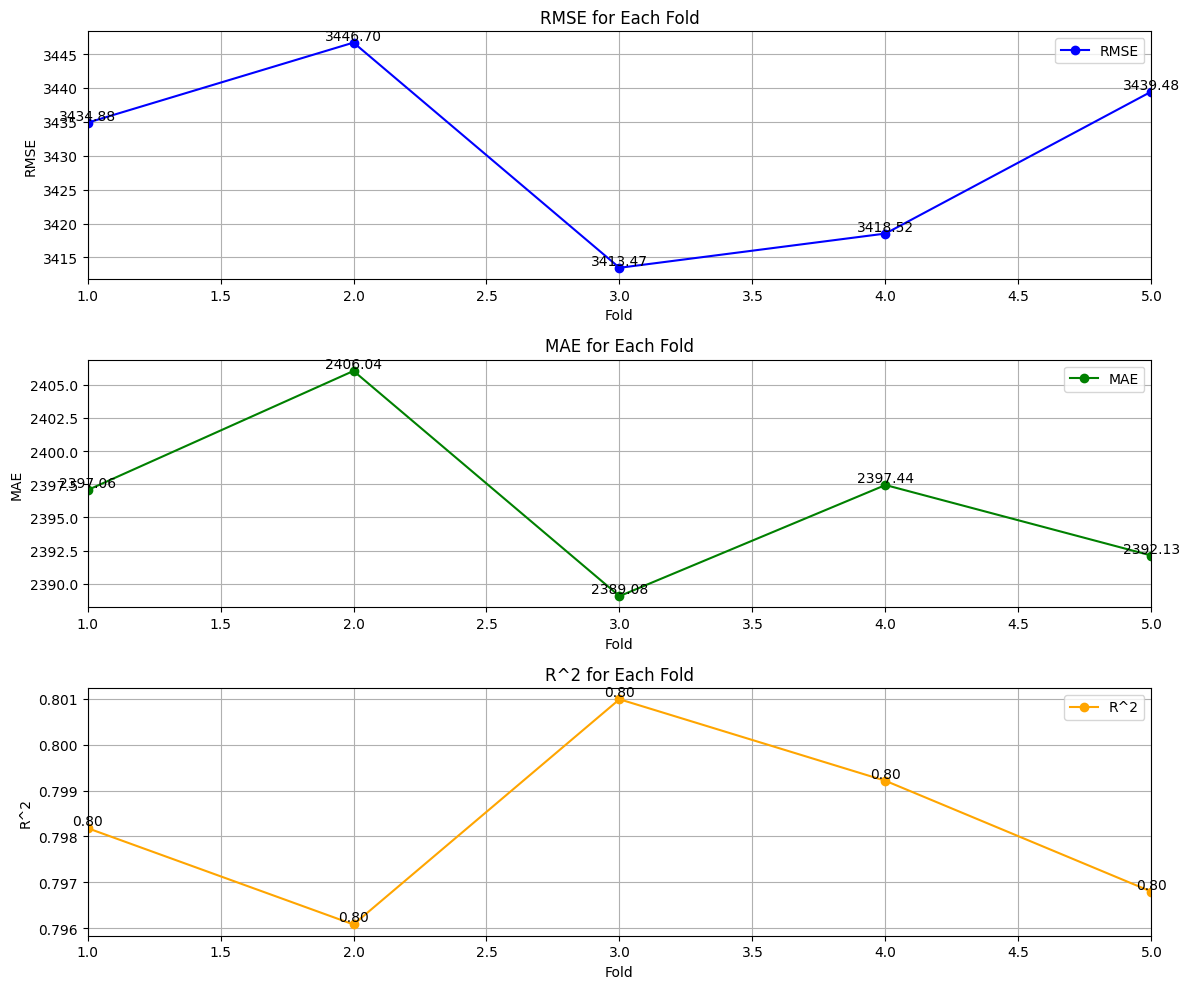

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df_lgb_model['Fold'] = pd.to_numeric(evaluation_df_lgb_model['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df_lgb_model['Fold'], evaluation_df_lgb_model['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df_lgb_model['RMSE']):
    axs[0].text(evaluation_df_lgb_model['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df_lgb_model['Fold'], evaluation_df_lgb_model['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df_lgb_model['MAE']):
    axs[1].text(evaluation_df_lgb_model['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df_lgb_model['Fold'], evaluation_df_lgb_model['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df_lgb_model['R^2']):
    axs[2].text(evaluation_df_lgb_model['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 405498, number of used features: 48
[LightGBM] [Info] Start training from score 13118.796389


In [ ]:
test_metrics_evaluation(lgb_model, y_pred, X_train, X_test, y_train, y_test)

RMSE: 3435.6005171155352
MAE: 2400.7541038380223
R2: 0.7967770175758807


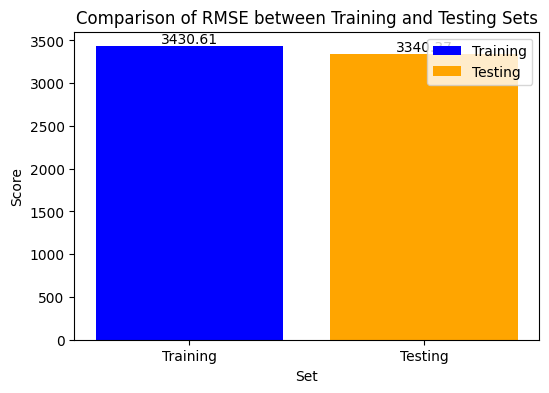

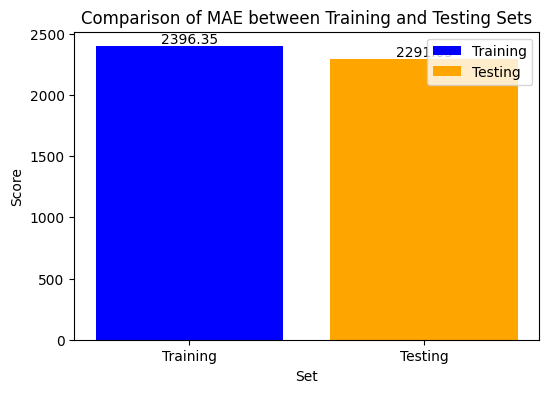

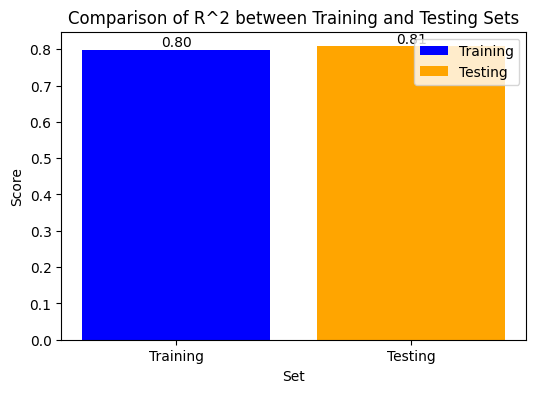

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df11 = pd.DataFrame(data_train)
evaluation_test_df12 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df11.loc[evaluation_train_df11['Metric'] == metric]
    test_row = evaluation_test_df12.loc[evaluation_test_df12['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom')

    plt.show()

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# List of hyperparameters
param_dist = {
    'learning_rate': uniform(0.01, 0.5),  # Distribusi kontinu dari 0.01 hingga 0.5
    'n_estimators': randint(50, 150),  # Distribusi integer dari 50 hingga 150
    'max_depth': randint(3, 10),  # Distribusi integer dari 3 hingga 10
    'subsample': uniform(0.8, 0.2),  # Distribusi kontinu dari 0.8 hingga 1.0
    'colsample_bytree': uniform(0.8, 0.2),  # Distribusi kontinu dari 0.8 hingga 1.0
    'reg_alpha': uniform(0, 1),  # Distribusi kontinu dari 0 hingga 1
    'reg_lambda': uniform(0, 1),  # Distribusi kontinu dari 0 hingga 1
    'min_child_samples': randint(5, 20),  # Distribusi integer dari 5 hingga 20
    'min_child_weight': uniform(0.1, 10)  # Distribusi kontinu dari 0.1 hingga 10
}

# Inisialisasi Model
lgbm = lgb.LGBMRegressor(random_state=42)
lgbm_tuned = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=15, cv=5, random_state=42, scoring='r2')
lgbm_tuned.fit(X_train, y_train)

# Predict & Evaluation
y_pred = lgbm_tuned.predict(X_test)

# Metrics Evaluation
print("Best Hyperparameters:", lgbm_tuned.best_params_)
print("R-squared on Test Set:", r2_score(y_test, y_pred))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE on Test Set:", mean_absolute_error(y_test, y_pred))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 324398, number of used features: 48
[LightGBM] [Info] Start training from score 13115.508351
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

Dari evaluasi tersebut maka hasil dapat digolongkan sebagai Good Fit karena memiliki perbedaan akurasi Train dan Test yang tidak begitu besar.

###Gradient Boosted Trees

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor  # Ganti dengan import GBT

# Inisialisasi model Gradient Boosted Trees
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Buat fungsi skor yang sesuai dengan RMSE, MAE, dan R2
rmse_scorer = make_scorer(lambda y, y_pred: mean_squared_error(y, y_pred, squared=False))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# Lakukan cross-validation dengan k=5 dan mengukur RMSE, MAE, dan R2
rmse_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=rmse_scorer)
mae_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=mae_scorer)
r2_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring=r2_scorer)

# Simpan hasil evaluasi dalam DataFrame
data = {'Fold': range(1, 6), 'RMSE': rmse_scores, 'MAE': mae_scores, 'R^2': r2_scores}
evaluation_df = pd.DataFrame(data)

# Tambahkan baris rata-rata
average_row = {'Fold': 'Rata-rata', 'RMSE': rmse_scores.mean(), 'MAE': mae_scores.mean(), 'R^2': r2_scores.mean()}
evaluation_df = evaluation_df.append(average_row, ignore_index=True)

print("Hasil Evaluasi tiap fold:")
print(evaluation_df)


Hasil Evaluasi tiap fold:
        Fold         RMSE          MAE       R^2
0          1  3872.365410  2831.391882  0.743496
1          2  3904.201024  2861.853048  0.738354
2          3  3875.216674  2838.394072  0.743504
3          4  3877.082362  2848.776284  0.741731
4          5  3905.141090  2853.530764  0.738048
5  Rata-rata  3886.801312  2846.789210  0.741027


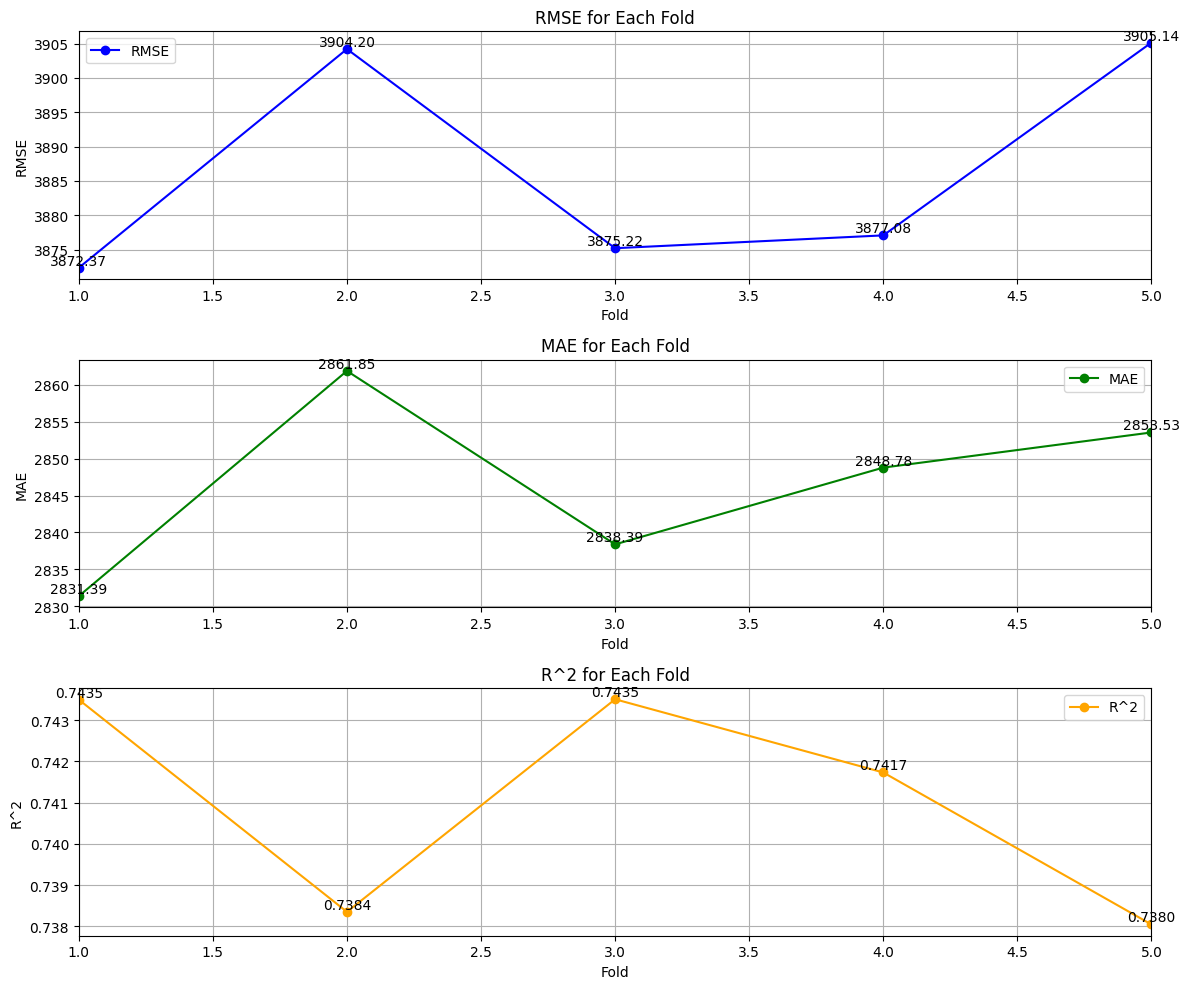

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Fold' column to numeric
evaluation_df['Fold'] = pd.to_numeric(evaluation_df['Fold'], errors='coerce')

# Set a wider figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# Plot RMSE
axs[0].plot(evaluation_df['Fold'], evaluation_df['RMSE'], marker='o', color='blue', label='RMSE')
for i, txt in enumerate(evaluation_df['RMSE']):
    axs[0].text(evaluation_df['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[0].set_title('RMSE for Each Fold')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('RMSE')
axs[0].legend()
axs[0].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[0].grid(True)  # Add grid lines

# Plot MAE
axs[1].plot(evaluation_df['Fold'], evaluation_df['MAE'], marker='o', color='green', label='MAE')
for i, txt in enumerate(evaluation_df['MAE']):
    axs[1].text(evaluation_df['Fold'][i], txt, f'{txt:.2f}', ha='center', va='bottom')
axs[1].set_title('MAE for Each Fold')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('MAE')
axs[1].legend()
axs[1].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[1].grid(True)  # Add grid lines

# Plot R^2
axs[2].plot(evaluation_df['Fold'], evaluation_df['R^2'], marker='o', color='orange', label='R^2')
for i, txt in enumerate(evaluation_df['R^2']):
    axs[2].text(evaluation_df['Fold'][i], txt, f'{txt:.4f}', ha='center', va='bottom')
axs[2].set_title('R^2 for Each Fold')
axs[2].set_xlabel('Fold')
axs[2].set_ylabel('R^2')
axs[2].legend()
axs[2].set_xlim(1, 5)  # Set x-axis limits to show only folds 1 to 5
axs[2].grid(True)  # Add grid lines

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Melakukan prediksi pada data uji
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Mengukur performa model pada data uji
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Menampilkan hasil pengujian pada data uji
print("\nHasil Pengujian pada Data Uji:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R^2: {r2_test}")


Hasil Pengujian pada Data Uji:
RMSE: 3880.6470437251505
MAE: 2841.799825436249
R^2: 0.7407159569481463


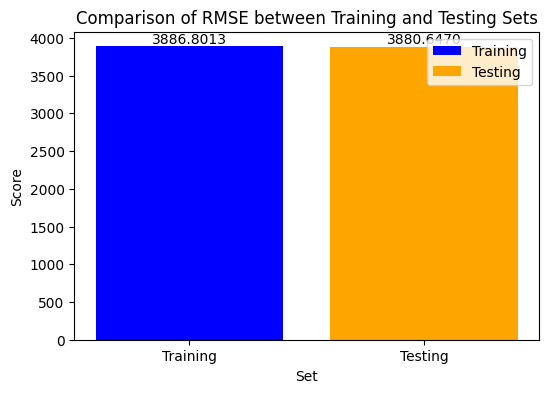

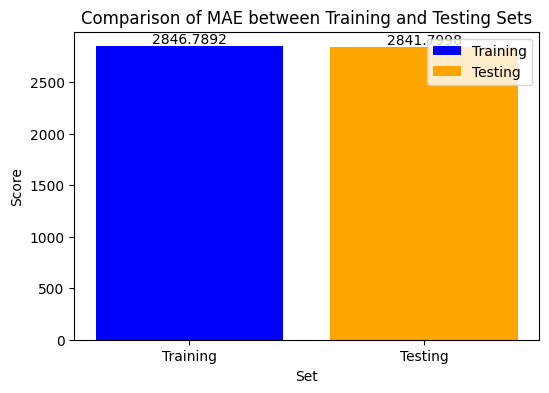

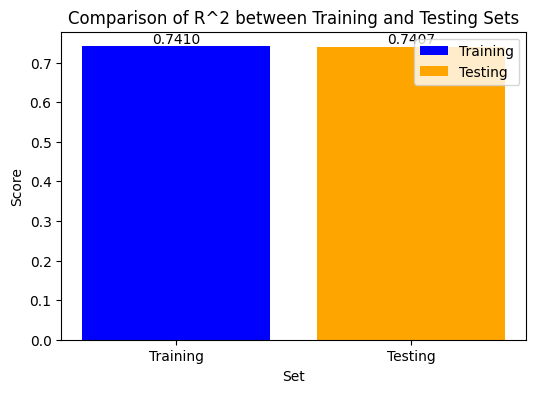

In [ ]:
# Create DataFrames
data_train = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_scores.mean(), mae_scores.mean(), r2_scores.mean()]}
data_test = {'Metric': ['RMSE', 'MAE', 'R^2'], 'Score': [rmse_test, mae_test, r2_test]}

evaluation_train_df11 = pd.DataFrame(data_train)
evaluation_test_df12 = pd.DataFrame(data_test)

# Create separate bar charts for each metric
metrics = ['RMSE', 'MAE', 'R^2']

for metric in metrics:
    plt.figure(figsize=(6, 4))

    # Get the row corresponding to the current metric
    train_row = evaluation_train_df11.loc[evaluation_train_df11['Metric'] == metric]
    test_row = evaluation_test_df12.loc[evaluation_test_df12['Metric'] == metric]

    bar1 = plt.bar(0, train_row['Score'].values[0], label='Training', color='blue')
    bar2 = plt.bar(1, test_row['Score'].values[0], label='Testing', color='orange')

    plt.xlabel('Set')
    plt.ylabel('Score')
    plt.title(f'Comparison of {metric} between Training and Testing Sets')
    plt.xticks([0, 1], ['Training', 'Testing'])
    plt.legend()

    # Display the values on top of the bars
    for bar in [bar1, bar2]:
        for rect in bar:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

    plt.show()

## Feature Importance

#### LightGBM Feature Importances

In [ ]:
# Ambil coefficient dari model
coefficients = lgbm_tuned.best_estimator_.feature_importances_

# Buat dataframe baru untuk feature dan coefficient
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Urutkan berdasarkan top 10
list_features = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)


print("List Feature Importances:")
print(list_features)

List Feature Importances:
                Feature  Coefficient
1         odometer_norm          606
0               car_age          544
2         condition_std          393
18             body_suv          101
17           body_sedan          100
39            trim_base           87
7             make_ford           67
12          make_toyota           60
5        make_chevrolet           56
11          make_nissan           55
21          color_black           54
13             body_cab           53
6            make_dodge           50
46              trim_se           44
16       body_hatchback           44
3             is_manual           37
10             make_kia           37
44              trim_lt           36
8            make_honda           34
4              make_bmw           33
19             body_van           33
42         trim_limited           31
45              trim_lx           31
9          make_hyundai           30
34         model_escape           29
29          

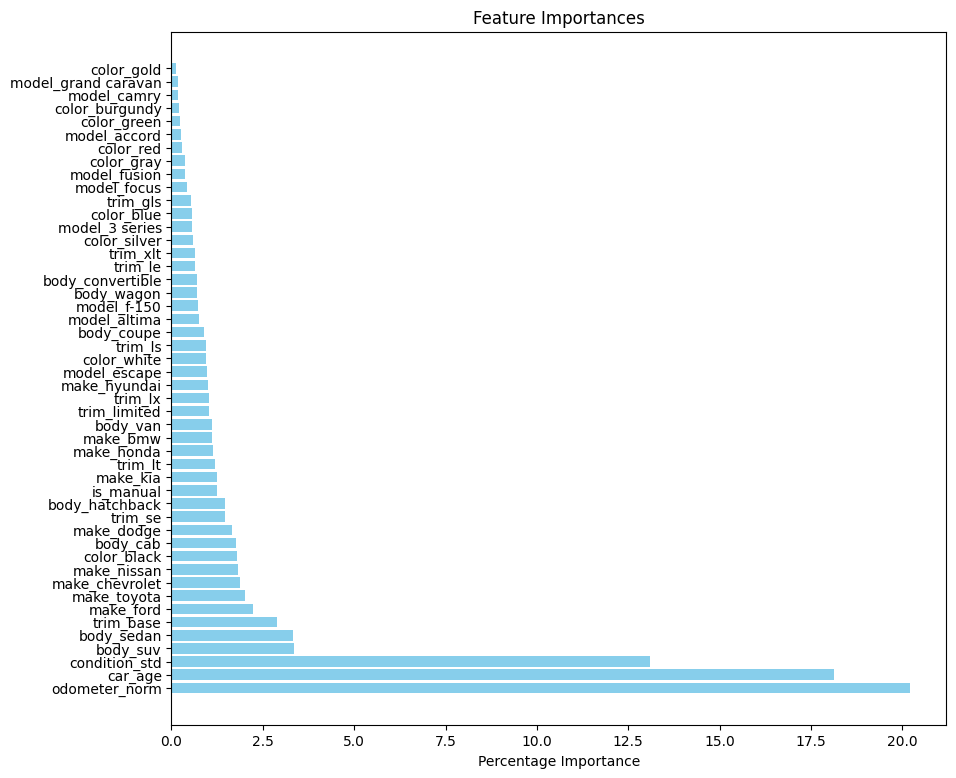

In [ ]:
total_importance = list_features['Coefficient'].sum()
list_features['Percentage'] = (list_features['Coefficient'] / total_importance) * 100

# Visualize the top features
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 9))
plt.barh(list_features['Feature'], list_features['Percentage'], color='skyblue')
plt.xlabel('Percentage Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
# Ambil coefficient dari model
coefficients = lgbm_tuned.best_estimator_.feature_importances_

# Buat dataframe baru untuk feature dan coefficient
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Urutkan berdasarkan top 10
top_features = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)


print("Top 10 Feature Importances:")
print(top_features)


Top 10 Feature Importances:
           Feature  Coefficient
1    odometer_norm          606
0          car_age          544
2    condition_std          393
18        body_suv          101
17      body_sedan          100
39       trim_base           87
7        make_ford           67
12     make_toyota           60
5   make_chevrolet           56
11     make_nissan           55


In [ ]:
# Create a new DataFrame for features and their percentages
features_percentage_df = top_features[['Feature', 'Percentage']].copy()

# Display the new DataFrame
print("Persentase Feature:")
print(features_percentage_df)

Persentase Feature:
           Feature  Percentage
1    odometer_norm      29.290
0          car_age      26.293
2    condition_std      18.995
18        body_suv       4.882
17      body_sedan       4.833
39       trim_base       4.205
7        make_ford       3.238
12     make_toyota       2.900
5   make_chevrolet       2.707
11     make_nissan       2.658


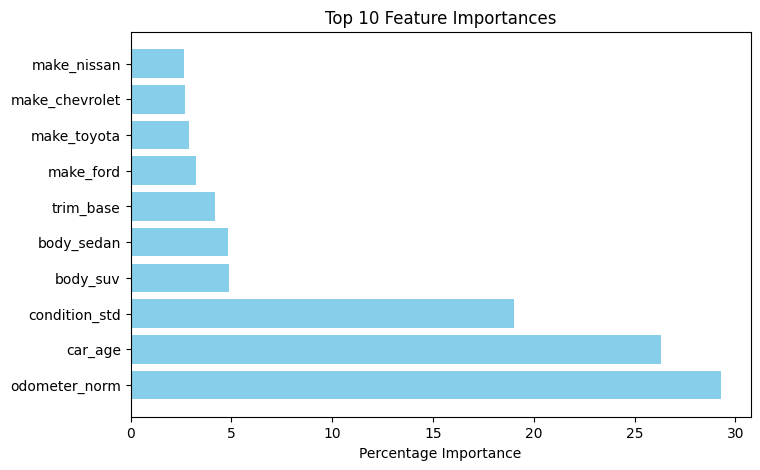

In [ ]:
total_importance = top_features['Coefficient'].sum()
top_features['Percentage'] = (top_features['Coefficient'] / total_importance) * 100

# Visualize the top features
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(8, 5))
plt.barh(top_features['Feature'], top_features['Percentage'], color='skyblue')
plt.xlabel('Percentage Importance')
plt.title('Top 10 Feature Importances')
plt.show()

Berdasarkan hasil feature importance dari model linear regression, lima feature yang paling penting adalah odometer_norm, car_Age, condition_std, body_SUV dan body_Sedan.


**Odometer_norm (Nilai dometer kendaraan)**

- Feature "odometer_norm" memiliki koefisien positif yang paling tinggi, yang artinya jika ada suatu peningkatan dalam nilai odometer_norm hal tersebut memberikan pengaruh positif pada harga jual.
- *Insight*: Nilai odometer memberikan informasi tentang jumlah kilometer penggunaan kendaraan. Kendaraan dengan nilai odometer rendah cenderung memiliki harga lebih tinggi. Namun, dari hasil koefisien feature importance pada odometer_norm. Semakin tinggi nilai nya maka akan memberikan pengaruh nilai positif pada target selling price.
- *Action Items*: Jika memungkinkan, perbaiki kondisi fisik atau mesin kendaraan yang memiliki nilai odometer rendah untuk menarik minat pembeli, karena kendaraan dengan odometer rendah memiliki harga jual yang lebih baik.



**Car_age (Umur kendaraan)**

- Feature "car_Age" juga memiliki koefisien positif yang tinggi. Hal ini menunjukkan bahwa perubahan dalam nilai car_Age memiliki dampak signifikan terhadap harga jual. Peningkatan nilai car_Age cenderung memberikan pengaruh positif pada selling_price/target.
- *Insight*: Berdasarkan business perspective, hal ini menunjukkan bahwa usia kendaraan (semakin tua) juga mempengaruhi harga jual secara signifikan.
- *Action Items*: Perusahaan dapat mempertimbangkan strategi harga untuk kendaraan yang lebih tua. Salah satu contoh nya mungkin dapat memberikan penawaran khusus atau menyoroti keunggulan lainnya dari kendaraan tersebut.





**Condition_std (Kondisi kendaraan)**

- Fitur "condition" memiliki koefisien positif, sehingga memberikan pengaruh positif  pada harga jual. Semakin naik nilai condition_std , semakin tinggi harga jualnya.

- *Insight:* Kondisi kendaraan artinya faktor yang sangat penting dalam menentukan harga jual. Calon pembeli akan cenderung memberikan nilai lebih tinggi pada kendaraan dalam kondisi baik.

- *Action Items:*
Agar memperoleh keuntungan, pastikan kendaraan yang akan dijual dalam kondisi sebaik mungkin, dengan melakukan perbaikan atau pemeliharaan pada kendaraan jika diperlukan.

**Body_SUV dan body_sedan (Body Kendaraan SUV dan Sedan)**

- Fitur "body_SUV" dan "body_sedan" memiliki koefisien positif, yang berarti jenis body SUV dan Sedan juga dapat mempengaruhi target/selling_price.
- *Insight*: Jenis body kendaraan juga memengaruhi harga jual. Body SUV dan Sedan cenderung memiliki harga lebih tinggi dibandingkan dengan jenis tipe body lainnya.
- *Action Items*: Fokuskan penjualan pada kendaraan dengan jenis tubuh yang memiliki harga jual lebih tinggi. Untuk kendaraan tipe body selain SUV dan Sedan, perusahaan harus dapat menawarkan fitur kelebihan kendaraan tersebut atau strategi marketing yang dapat meningkatkan daya tariknya.

#### XGBoost Feature Importance

##### Tuning Lama

In [ ]:
# Ambil coefficient dari model
coefficients = best_model1.feature_importances_

# Buat dataframe baru untuk feature dan coefficient
coef_df = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})

# Urutkan berdasarkan top 10
list_features = coef_df.reindex(coef_df['Importance'].abs().sort_values(ascending=False).index)


print("List Feature Importances:")
print(list_features)

List Feature Importances:
                Feature  Importance
16       body_hatchback       0.099
4              make_bmw       0.096
1         odometer_norm       0.088
0               car_age       0.085
17           body_sedan       0.079
13             body_cab       0.037
2         condition_std       0.036
35          model_f-150       0.032
46              trim_se       0.030
10             make_kia       0.029
18             body_suv       0.029
34         model_escape       0.027
11          make_nissan       0.027
40             trim_gls       0.024
43              trim_ls       0.022
9          make_hyundai       0.021
39            trim_base       0.020
45              trim_lx       0.019
38  model_grand caravan       0.018
47             trim_xlt       0.016
5        make_chevrolet       0.016
6            make_dodge       0.014
41              trim_le       0.014
20           body_wagon       0.013
36          model_focus       0.013
21          color_black       0.012
30

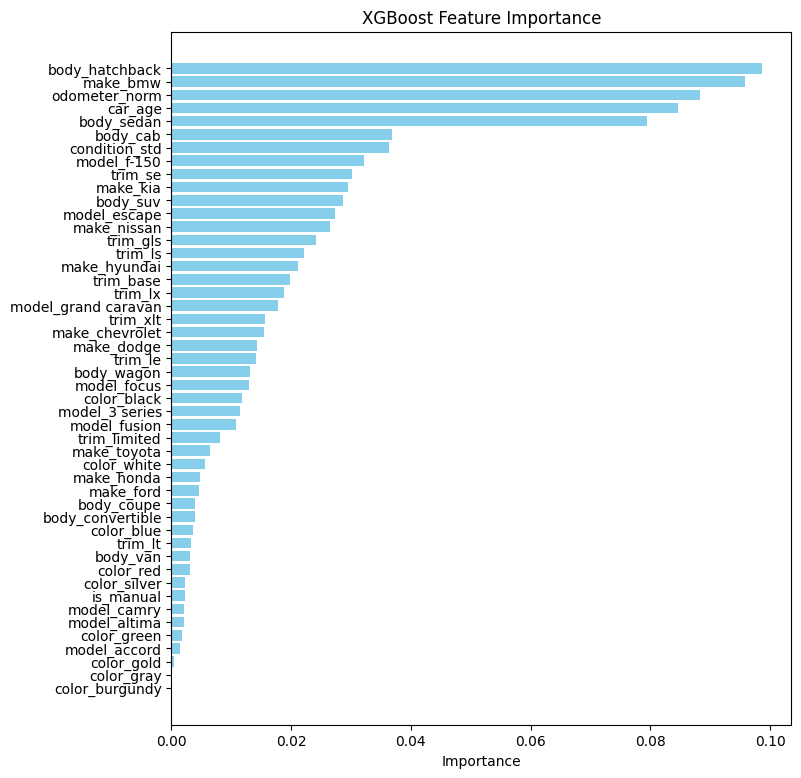

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = best_model1.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Visualize feature importance
plt.figure(figsize=(8, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()


##### Tuning Baru

In [ ]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the top features
features = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 10 feature importances
print("Feature Importances:")
print(features)


Feature Importances:
                Feature  Importance
4              make_bmw       0.096
1         odometer_norm       0.088
17           body_sedan       0.087
0               car_age       0.085
16       body_hatchback       0.078
2         condition_std       0.044
46              trim_se       0.039
13             body_cab       0.032
11          make_nissan       0.030
40             trim_gls       0.030
43              trim_ls       0.029
45              trim_lx       0.025
10             make_kia       0.025
34         model_escape       0.024
38  model_grand caravan       0.024
35          model_f-150       0.022
18             body_suv       0.021
39            trim_base       0.020
9          make_hyundai       0.020
47             trim_xlt       0.016
6            make_dodge       0.015
5        make_chevrolet       0.014
36          model_focus       0.014
20           body_wagon       0.013
41              trim_le       0.013
37         model_fusion       0.012
30     

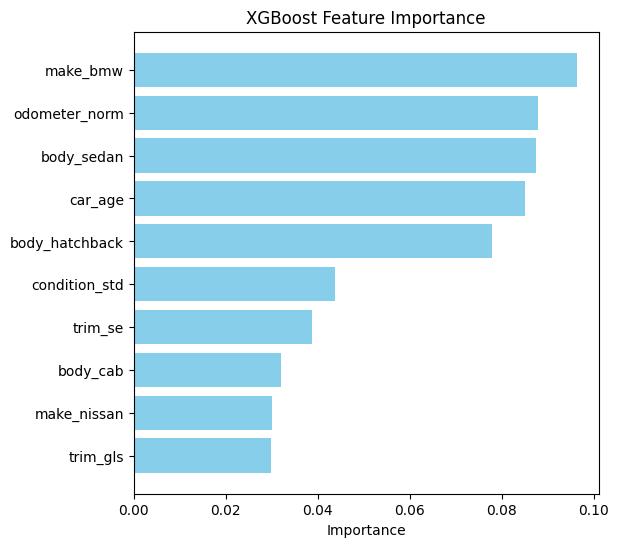

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Extract feature importance
feature_importance = best_model.feature_importances_

# Get the names of features
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

top_10_importance = importance_df.tail(10)

# Visualize feature importance
plt.figure(figsize=(6, 6))
plt.barh(top_10_importance['Feature'], top_10_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
# Extract feature importances
feature_importances = best_model.feature_importances_

# Calculate the sum of feature importances
total_importance = np.sum(feature_importances)

# Create a DataFrame to store feature importances along with feature names
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values to get the top features
features = importance_df.sort_values(by='Importance', ascending=False)

# Convert importances to percentages
features['Percentage'] = (features['Importance'] / total_importance) * 100

# Print the top 10 feature importances with percentages
print("Top 10 Feature Importances:")
print(features.head(10))


Top 10 Feature Importances:
           Feature  Importance  Percentage
4         make_bmw       0.096       9.630
1    odometer_norm       0.088       8.786
17      body_sedan       0.087       8.745
0          car_age       0.085       8.503
16  body_hatchback       0.078       7.792
2    condition_std       0.044       4.383
46         trim_se       0.039       3.874
13        body_cab       0.032       3.209
11     make_nissan       0.030       3.004
40        trim_gls       0.030       2.976


Berdasarkan hasil Feature Importances di atas, beberapa hal dapat diinterpretasikan:

**1. Make BMW (Merk Kendaraan BMW)**

- Interpretasi: Feature "make_bmw" memiliki nilai importance tertinggi, yaitu sebesar 0.096. Koefisien ini menunjukkan bahwa keberadaan merek BMW memberikan pengaruh yang signifikan pada target (selling price).

- Insight: Merek kendaraan dapat menjadi faktor penting dalam menentukan harga jual. Hal ini artinya kendaraan dengan merek BMW memiliki daya tarik dan nilai jual yang tinggi.

- Action Items: Fokus pada pemasaran dan penonjolan keunggulan merek BMW pada kendaraan untuk meningkatkan daya tarik dan potensi penjualan.

**2. Odometer_norm (Nilai Dometer yang Dinormalisasi)**

- Interpretasi: Feature "odometer_norm" memiliki importance sebesar 0.088. Koefisien  menunjukkan bahwa peningkatan nilai odometer_norm memberikan pengaruh  pada selling price.

- Insight: Nilai odometer_norm memberikan informasi tentang jumlah kilometer penggunaan kendaraan. Meskipun memiliki koefisien positif, penting untuk diingat bahwa semakin tinggi nilai odometer_norm, semakin rendah selling price nya.

- Action Items: Jika memungkinkan, perbaiki kondisi fisik atau mesin kendaraan yang memiliki nilai odometer rendah untuk menarik minat pembeli, karena kendaraan dengan odometer rendah memiliki harga jual yang lebih baik.

**3. Body Sedan (Tipe Body Sedan)**

- Interpretasi: Feature "body_sedan" memiliki importance sebesar 0.087, menunjukkan bahwa kendaraan dengan tipe bodi sedan memiliki pengaruh  pada selling price.

- Insight: Tipe bodi kendaraan seperti sedan, dapat memengaruhi selling price. Tipe Body Sedan mungkin memiliki permintaan yang lebih tinggi dibandingkan jenis body lainnya.

- Action Items: Jika memungkinkan, lebih tonjolkan atau perbaiki kendaraan dengan tipe bodi sedan untuk memaksimalkan potensi penjualan.

**4. Car Age (Usia Kendaraan)**

- Interpretasi: Feature "car_age" dengan koefisien sebesar 0.085 menunjukkan bahwa usia kendaraan memberikan pengaruh pada selling price.

- Insight: Meskipun kendaraan baru mungkin memiliki selling price yang tinggi, usia kendaraan dapat memberikan karakteristik unik/antik dan dapat memengaruhi selling price.

- Action Items: Jika memungkinkan, perhatikan dan tonjolkan kelebihan yang dimiliki oleh kendaraan yang sudah berusia untuk meningkatkan daya tarik pada pembeli.

**5. Body Hatchback (Tipe BodI: Hatchback)**

- Interpretasi: Feature "body_hatchback" dengan importance 0.078 menunjukkan bahwa kendaraan dengan tipe bodi hatchback memiliki pengaruh pada selling price.

- Insight: Seperti halnya sedan, tipe bodi hatchback mungkin memiliki daya tarik tersendiri yang dapat meningkatkan selling price.

- Action Items: Perhatikan potensi peningkatan penjualan dengan mempertahankan atau meningkatkan kondisi kendaraan hatchback.